# **Medicare Fraud Detection - Data Audit Report**

## Executive Summary

This part focuses on auditing the data that will be used for analysis throughout the project, and transforming it for use in machine learning models, which will be done in the next part.

In this data audit, we do the following things to understand the dataset and transform for later consumption:

*   **Data quality checks**: do the data make sense? Here we identify anything that later needs to be remediated before we work on analysis
*   **Checking expected values**: Does the data meet expectations for the domain? We need to see if the population of data make sense based on the definitions of each field
*   **Exploratory data analysis**: Charts galore - we use this to find outliers which will later be managed so we can model the data. We also look for any additional questions that may come up through visualizing the data
*   **Imputation**: dealing with NA values that arise, as the models will require values here to work properly
*   **Outlier Handling**: outliers can impact the effectiveness of a model; here we eliminate that risk
*   **Scaling**: scaling brings the data points closer together, reducing overall uncertainty for the models later on
*   **Standardization**: here we fit the data around the mean with a standard deviation of one, with the goal of bringin features to a common scale while maintaining the differences in ranges of values

## Data Dictionary
| Field Name  |  Description | Type of Data |
|----------|-------------|------------|
|**Target**|
|PotentialFraud|Class label to indicate whether the Provider is a fraud or not|string|
**Beneficiary Data**
|DOB|Date of birth of the beneficiary|string|
|DOD|Date of death of the beneficiary in case the beneficiary is dead, otherwise, this contains the NaN value|string|
|Gender|Numeric code for gender|int64|
|Race|Numeric code for race|int64|
|RenalDiseaseIndicator|Flag to indicate whether the beneficiary has any problem related to kidney failure or not|string|
|State|Numeric code for state|int64|
|County|Numeric code for county|int64|
|NoOfMonths_PartACov|Number of Months Patient has had Medicare Part A Coverage|int64|
|NoOfMonths_PartBCov|Number of Months Patient has had Medicare Part B Coverage|int64|
|ChronicCond_Alzheimer|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_Heartfailure|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_KidneyDisease|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_Cancer|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_ObstrPulmonary|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_Depression|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_Diabetes|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_IschemicHeart|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_Osteoporasis|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_rheumatoidarthritis|Whether a beneficiary has a chronic disease|int64|
|ChronicCond_stroke|Whether a beneficiary has a chronic disease|int64|
|IPAnnualReimbursementAmt|Annual amount reimbursed for the treatment of the beneficiary when admitted to the hospital|int64|
|IPAnnualDeductibleAmt|Annual premium amount paid to the Insurance Agency towards the treatment of the beneficiary when admitted to the hospital|int64|
|OPAnnualReimbursementAmt|Annual amount reimbursed for the treatment of the beneficiary when visited the hospital but not admitted|int64|
|OPAnnualDeductibleAmt|Annual premium amount paid to the Insurance Agency towards the treatment of the beneficiary when he visited the hospital but was not admitted|int64|
**Inpatient and Outpatient Data**
|BeneID|Unique identifier of the beneficiary who is registered to the health insurance provided by the Payer|string|
|ClaimID|Unique identifier of the health insurance claim|string|
|ClaimStartDt|Dates indicating when the insurance claim was submitted|string|
|ClaimEndDt|Dates indicating when the insurance claim was settled and closed|string|
|Provider|Unique identifier for a Provider (Hospital, Pharmacy, Laboratories, etc)|string|
|InscClaimAmtReimbursed|Amount reimbursed by the Payer (Insurance Agency) for the healthcare services provided to the beneficiary|int64|
|AttendingPhysician|Columns showing the physicians who attended the beneficiary/patient, operated the patient, and any other physicians if any|string|
|OperatingPhysician||string|
|OtherPhysician||string|
|AdmissionDt|Columns showing the dates on which the beneficiary was admitted to the hospital and when he was discharged|string|
|DischargeDt||string|
|ClmAdmitDiagnosisCode|Diagnosis code indicating the beneficiary’s initial diagnosis at admission|string|
|DeductibleAmtPaid|Amount the beneficiary has to pay as part of the claim, and the rest of the amount is paid by the insurance company|float64|
|DiagnosisGroupCode|Code to classify hospital cases, referred to as DRGs, which are expected to have similar hospital resource use (cost)|string|
|ClmDiagnosisCode_1|Diagnosis code identifying the beneficiary’s principal diagnosis|string|
|ClmDiagnosisCode_2|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmDiagnosisCode_3|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmDiagnosisCode_4|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmDiagnosisCode_5|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmDiagnosisCode_6|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmDiagnosisCode_7|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmDiagnosisCode_8|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmDiagnosisCode_9|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmDiagnosisCode_10|Diagnosis code in the nth position identifying the condition(s) for which the beneficiary is receiving care|string|
|ClmProcedureCode_1|Codes that indicate the principal or other procedures performed during the period covered by the institutional claim|float64|
|ClmProcedureCode_2|Codes that indicate the principal or other procedures performed during the period covered by the institutional claim|float64|
|ClmProcedureCode_3|Codes that indicate the principal or other procedures performed during the period covered by the institutional claim|float64|
|ClmProcedureCode_4|Codes that indicate the principal or other procedures performed during the period covered by the institutional claim|float64|
|ClmProcedureCode_5|Codes that indicate the principal or other procedures performed during the period covered by the institutional claim|float64|
|ClmProcedureCode_6|Codes that indicate the principal or other procedures performed during the period covered by the institutional claim|float64|


## Import Data

### Import Pandas

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





### Import Data

In [ ]:
# Read Excel file and set up in
Train = pd.read_csv("/content/drive/MyDrive/DATA6999/Train.csv",na_values='-')
Train_Beneficiarydata = pd.read_csv("/content/drive/MyDrive/DATA6999/Train_Beneficiarydata.csv",na_values='-')
Train_Inpatientdata = pd.read_csv("/content/drive/MyDrive/DATA6999/Train_Inpatientdata.csv",na_values='-')
Train_Outpatientdata = pd.read_csv("/content/drive/MyDrive/DATA6999/Train_Outpatientdata.csv",na_values='-')

Test = pd.read_csv("/content/drive/MyDrive/DATA6999/Test.csv",na_values='-')
Test_Beneficiarydata = pd.read_csv("/content/drive/MyDrive/DATA6999/Test_Beneficiarydata.csv",na_values='-')
Test_Inpatientdata = pd.read_csv("/content/drive/MyDrive/DATA6999/Test_Inpatientdata.csv",na_values='-')
Test_Outpatientdata = pd.read_csv("/content/drive/MyDrive/DATA6999/Test_Outpatientdata.csv",na_values='-')

In [ ]:
# Check that data import is completed successfully

Train.head(5)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
Train_Beneficiarydata.head(5)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
Train_Inpatientdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
Train_Outpatientdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


## EDA

Exploratory Data Analysis - here we will find any additional questions that pop up with the data where we will either note it for later analysis, or look into it further.


### Exploring datasets


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()

def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

In [ ]:
Train.groupby(["PotentialFraud"]).Provider.count()


PotentialFraud
No     4904
Yes     506
Name: Provider, dtype: int64

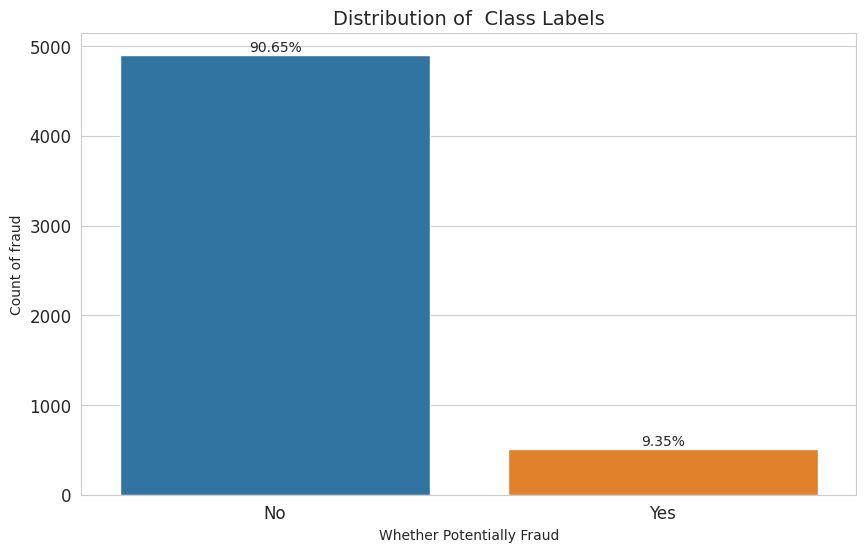

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='PotentialFraud',data=Train)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Distribution of  Class Labels', fontsize=14)
plt.xlabel('Whether Potentially Fraud', size = 10)
plt.ylabel('Count of fraud', size = 10)
percentage_without_hue(ax, Train['PotentialFraud'], 0,40,10)

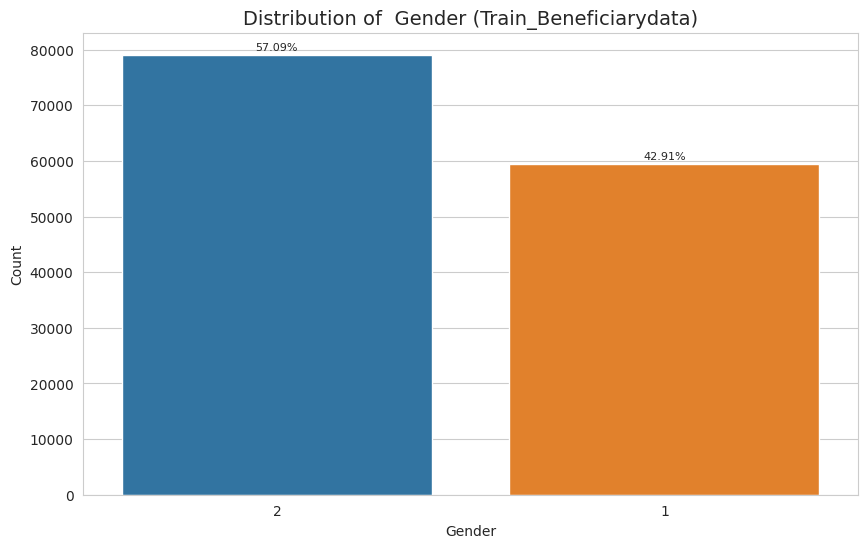

In [ ]:
# Plot distribution of gender in Beneficiaries data
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender',data=Train_Beneficiarydata, order = Train_Beneficiarydata['Gender'].value_counts().index)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Distribution of  Gender (Train_Beneficiarydata)', fontsize=14)
plt.xlabel('Gender', size = 10)
plt.ylabel('Count', size = 10)
percentage_without_hue(ax, Train_Beneficiarydata['Gender'], 0,800,8)

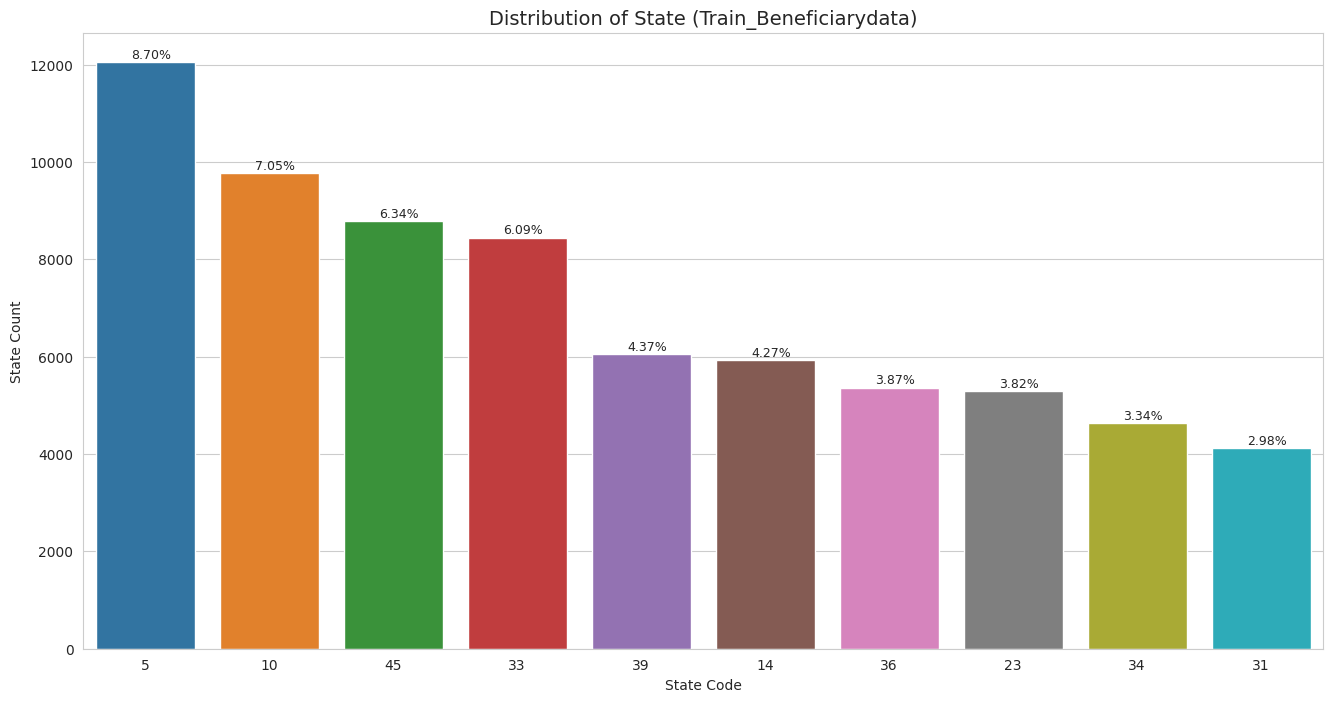

In [ ]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='State',y=None, data=Train_Beneficiarydata, orient ="v", order = Train_Beneficiarydata['State'].value_counts().head(10).index)
plt.title('Distribution of State (Train_Beneficiarydata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('State Code', size = 10)
plt.ylabel('State Count', size = 10)
percentage_without_hue(ax, Train_Beneficiarydata['State'], 0.05, 80,9)

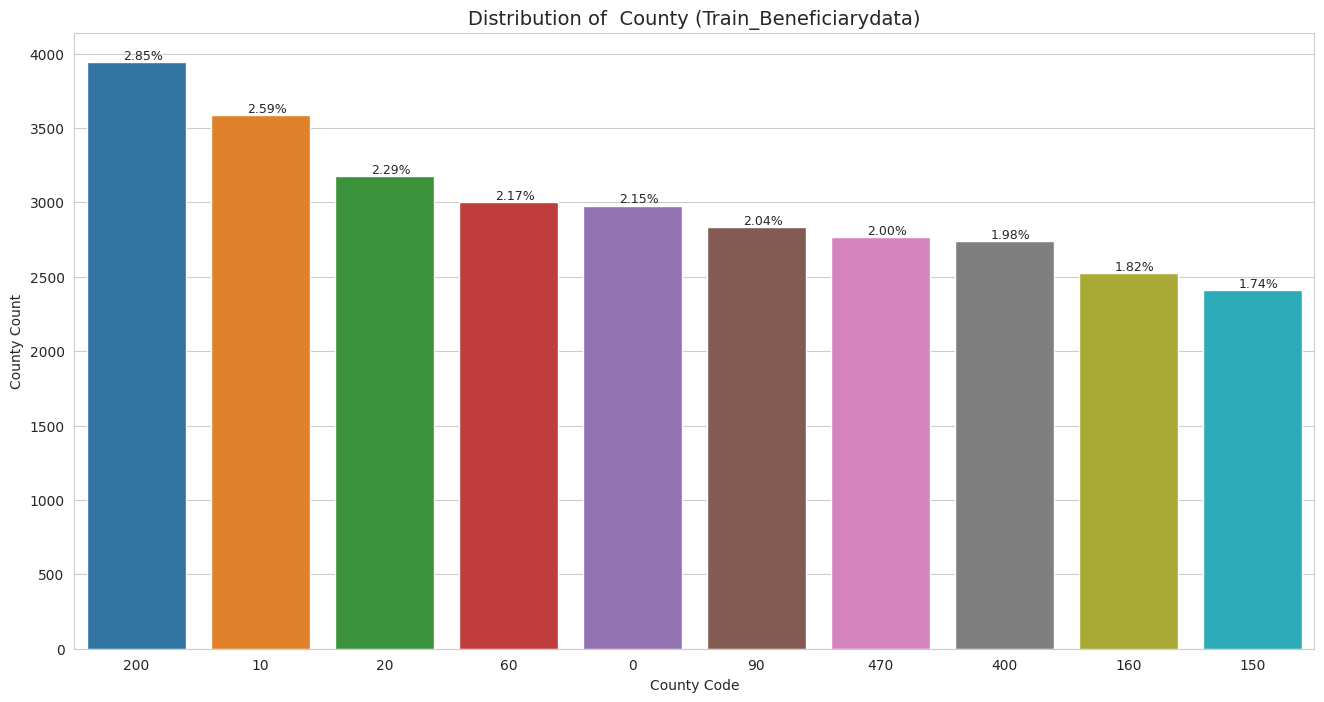

In [ ]:
# Plot top 20 Country from where the beneficiaries belong
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='County',y=None, data=Train_Beneficiarydata, orient ="v", order = Train_Beneficiarydata['County'].value_counts().head(10).index)
plt.title('Distribution of  County (Train_Beneficiarydata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('County Code', size = 10)
plt.ylabel('County Count', size = 10)
percentage_without_hue(ax, Train_Beneficiarydata['County'], 0.05, 20,9)

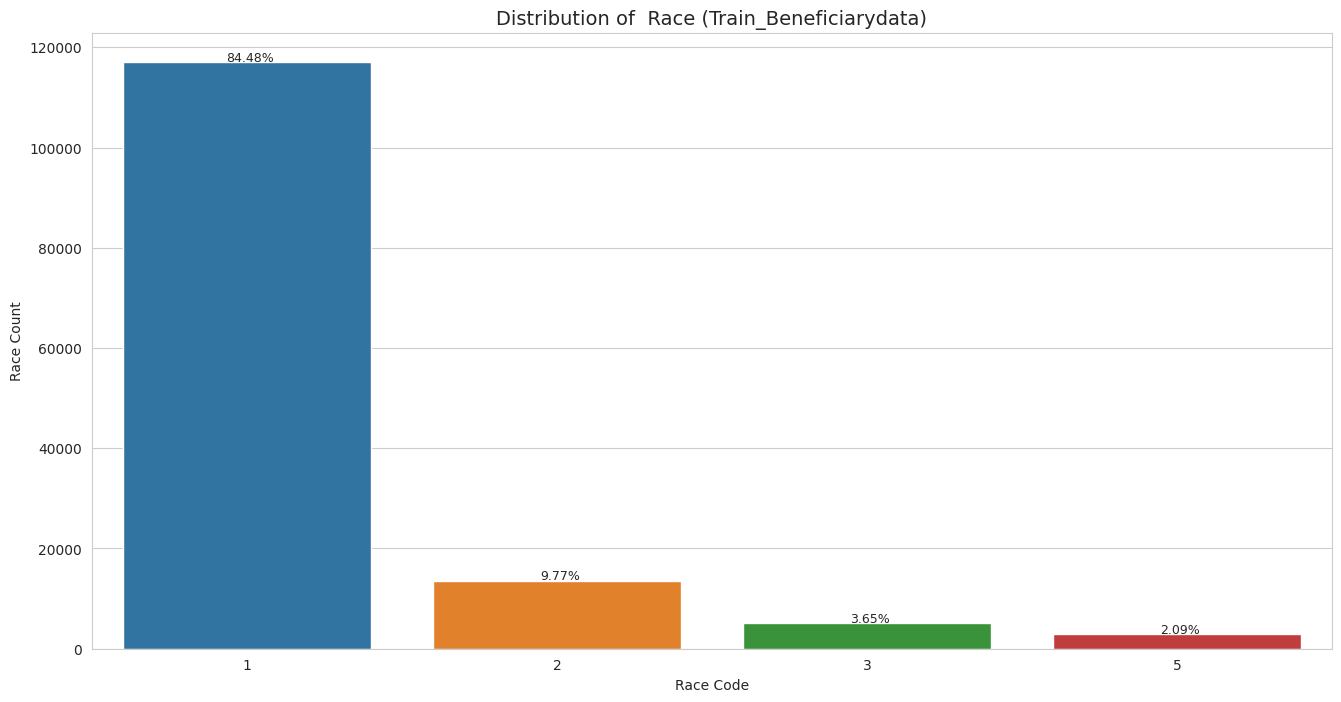

In [ ]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Race',y=None, data=Train_Beneficiarydata, orient ="v", order = Train_Beneficiarydata['Race'].value_counts().index)
plt.title('Distribution of  Race (Train_Beneficiarydata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Race Code', size = 10)
plt.ylabel('Race Count', size = 10)
percentage_without_hue(ax, Train_Beneficiarydata['Race'], 0.01, 200,9)

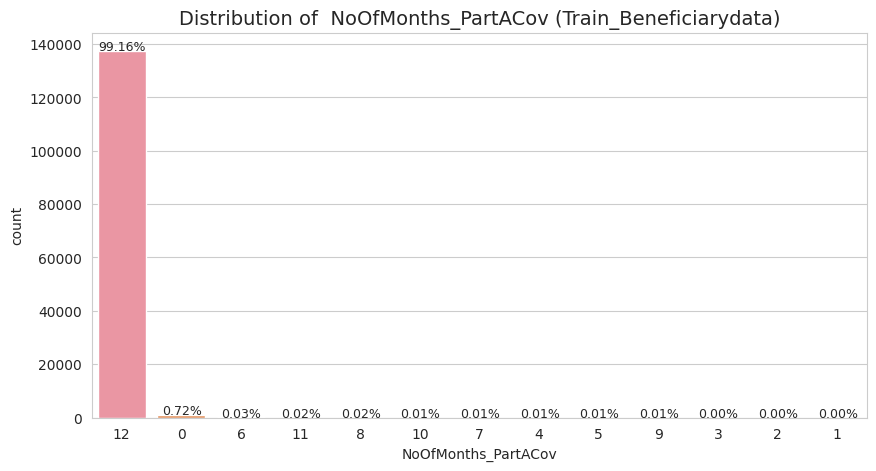

In [ ]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartACov',y=None, data=Train_Beneficiarydata, orient ="v", order = Train_Beneficiarydata['NoOfMonths_PartACov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartACov (Train_Beneficiarydata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 10)
# plt.ylabel('Race Count', size = 10)
percentage_without_hue(ax, Train_Beneficiarydata['Race'], 0.01, 200,9)

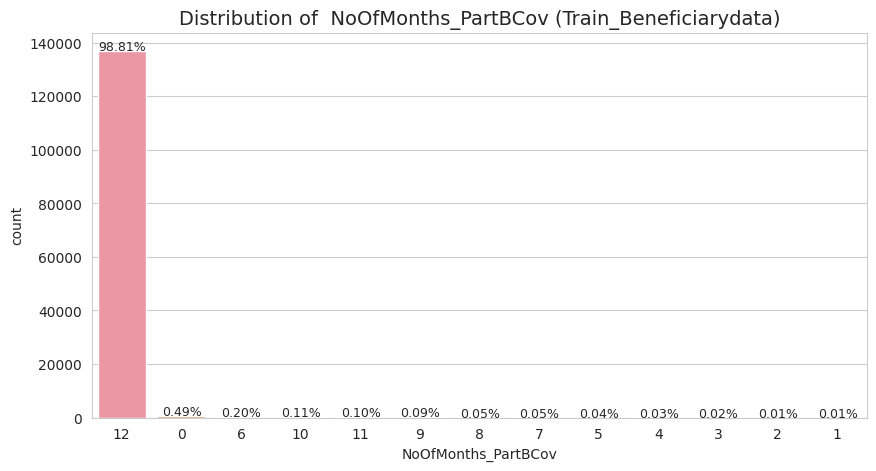

In [ ]:
# Plot distribution of race in beneficiaries data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='NoOfMonths_PartBCov',y=None, data=Train_Beneficiarydata, orient ="v", order = Train_Beneficiarydata['NoOfMonths_PartBCov'].value_counts().index)
plt.title('Distribution of  NoOfMonths_PartBCov (Train_Beneficiarydata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
# plt.xlabel('Race Code', size = 10)
# plt.ylabel('Race Count', size = 10)
percentage_without_hue(ax, Train_Beneficiarydata['Race'], 0.01, 200,9)

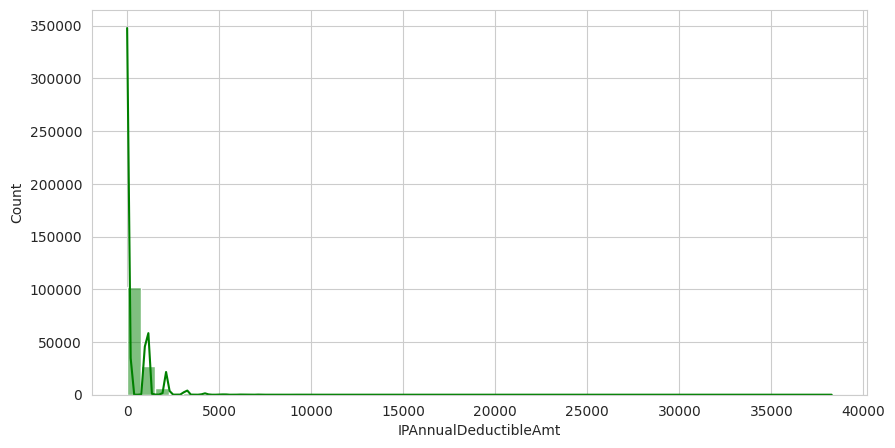

In [ ]:
# Plot distribution of IPAnnualDeductibleAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiarydata['IPAnnualDeductibleAmt'], kde = True, color ='green', bins = 50)
plt.show()

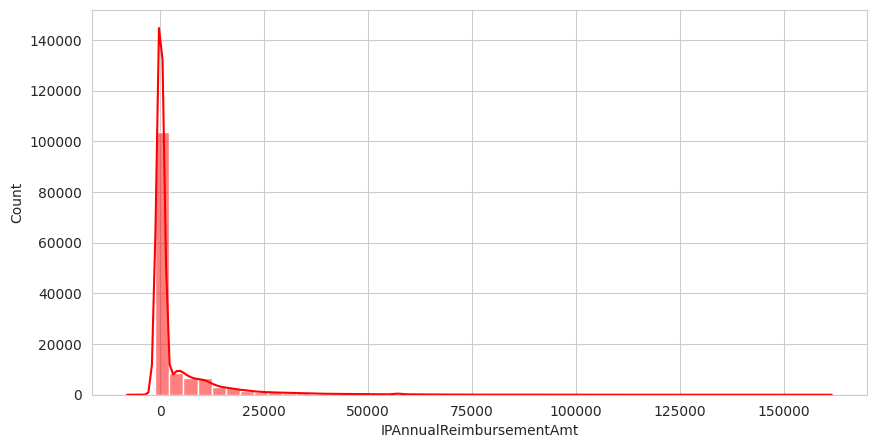

In [ ]:
# Plot distribution of IPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiarydata['IPAnnualReimbursementAmt'], kde = True, color ='red', bins = 50)
plt.show()

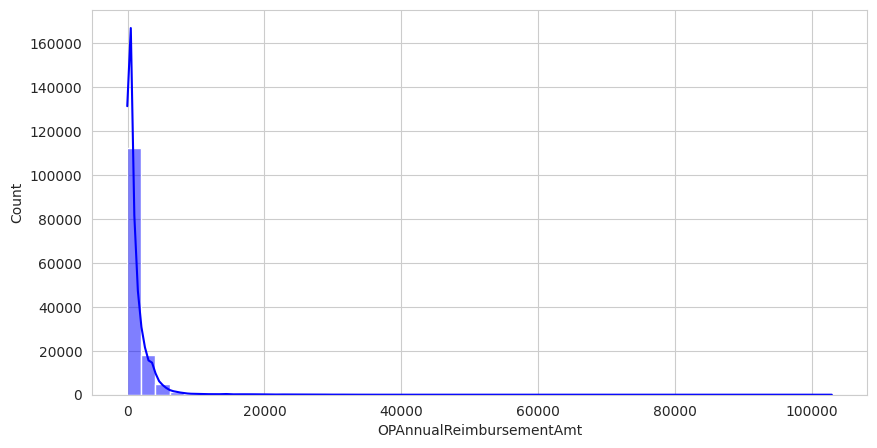

In [ ]:
# Plot distribution of OPAnnualReimbursementAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiarydata['OPAnnualReimbursementAmt'], kde = True, color ='blue', bins = 50)
plt.show()

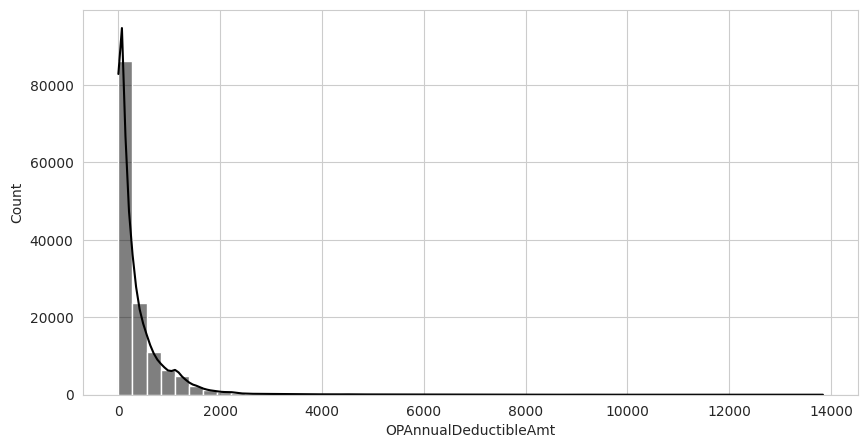

In [ ]:
# Plot distribution of OPAnnualDeductibleAmt
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiarydata['OPAnnualDeductibleAmt'], kde = True, color ='black', bins = 50)
plt.show()

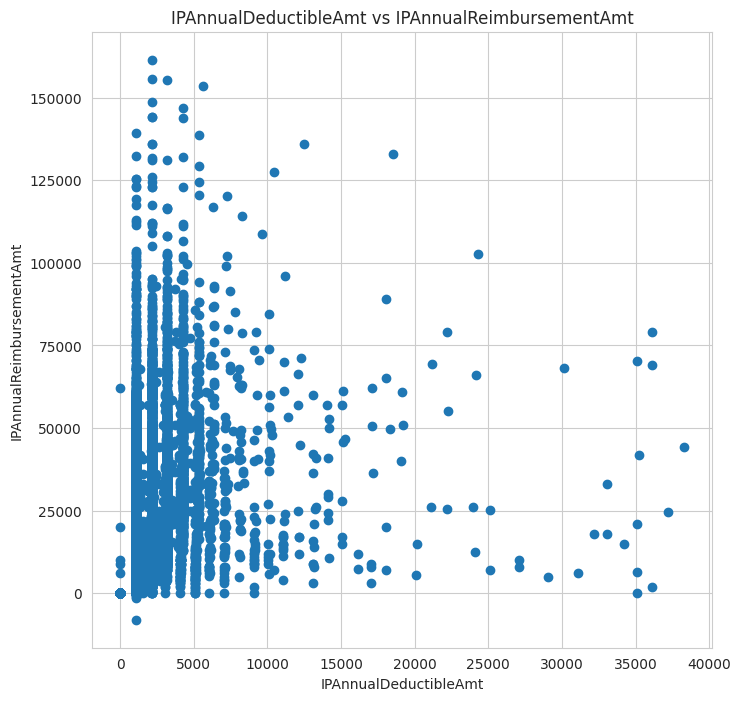

In [ ]:
# Plot Scatterplot IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt
plt.figure(figsize=(8, 8))
plt.scatter(Train_Beneficiarydata.IPAnnualDeductibleAmt, Train_Beneficiarydata.IPAnnualReimbursementAmt)
plt.xlabel('IPAnnualDeductibleAmt')
plt.ylabel('IPAnnualReimbursementAmt')
plt.title('IPAnnualDeductibleAmt vs IPAnnualReimbursementAmt')
plt.show()

### Box Plots for Continuous dollar value fields

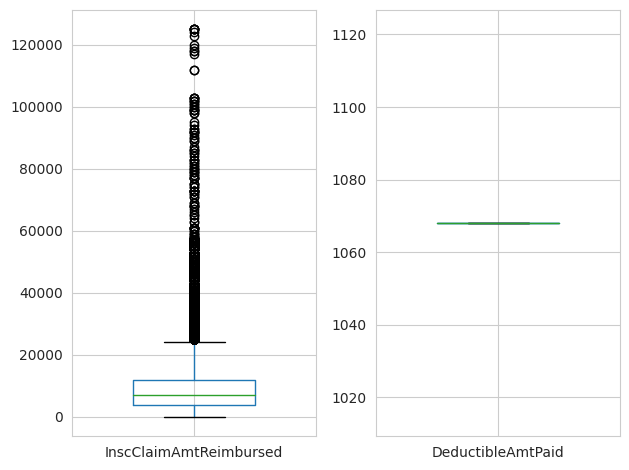

In [ ]:
fig, axes = plt.subplots(1,2) # create figure and axes

df = Train_Inpatientdata[['InscClaimAmtReimbursed','DeductibleAmtPaid']]

for i,c in enumerate(list(df.columns.values)):  #if chart labels in last column @ df: (list(df.columns.values)[:-1])
    a = df.boxplot(c, ax=axes.flatten()[i], widths=0.5)

#fig.delaxes(axes[1,2]) # remove empty subplot
plt.tight_layout()

plt.show()

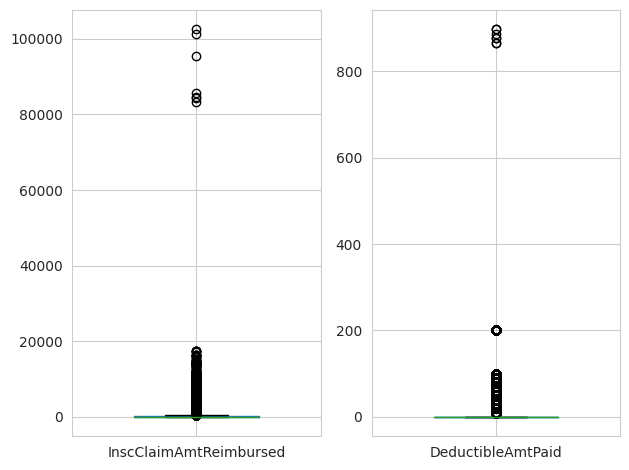

In [ ]:
fig, axes = plt.subplots(1,2) # create figure and axes

df = Train_Outpatientdata[['InscClaimAmtReimbursed','DeductibleAmtPaid']]

for i,c in enumerate(list(df.columns.values)):  #if chart labels in last column @ df: (list(df.columns.values)[:-1])
    a = df.boxplot(c, ax=axes.flatten()[i], widths=0.5)

#fig.delaxes(axes[1,2]) # remove empty subplot
plt.tight_layout()

plt.show()

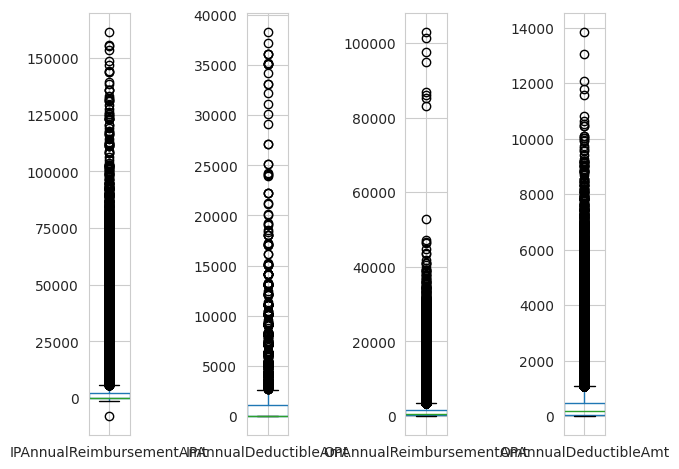

In [ ]:
fig, axes = plt.subplots(1,4) # create figure and axes

df = Train_Beneficiarydata[['IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']]

for i,c in enumerate(list(df.columns.values)):  #if chart labels in last column @ df: (list(df.columns.values)[:-1])
    a = df.boxplot(c, ax=axes.flatten()[i], widths=1)

#fig.delaxes(axes[1,2]) # remove empty subplot
plt.tight_layout()

plt.show()

### Looking at conditions

In [ ]:
import re

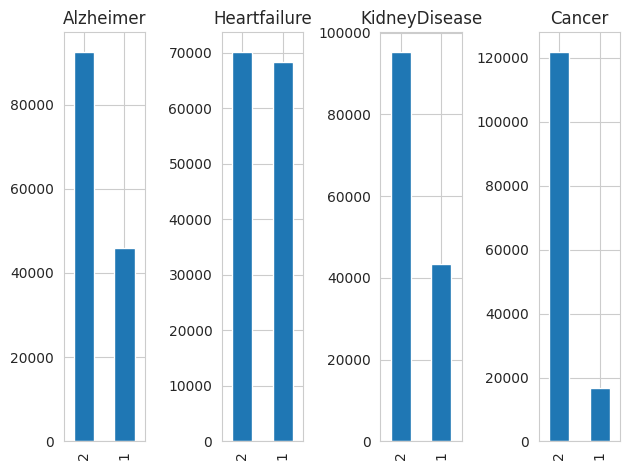

In [ ]:
df = Train_Beneficiarydata

c = ['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer']

fig, ax = plt.subplots(1, 4)

order = [2,1]

for i, c in enumerate(df[c]):
    df[c].value_counts().loc[order].plot(kind="bar", ax=ax[i]).set_title(re.sub(r'^.*?_','',c))
fig.tight_layout()
fig.show()

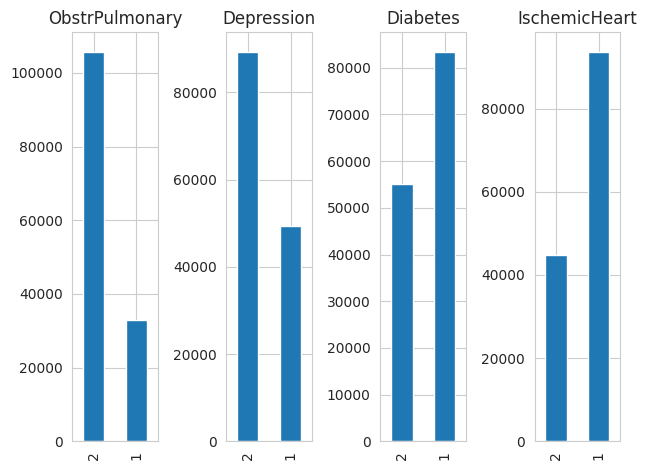

In [ ]:
df = Train_Beneficiarydata

c = ['ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart']

fig, ax = plt.subplots(1, 4)

order = [2,1]

for i, c in enumerate(df[c]):
    df[c].value_counts().loc[order].plot(kind="bar", ax=ax[i]).set_title(re.sub(r'^.*?_','',c))
fig.tight_layout()
fig.show()

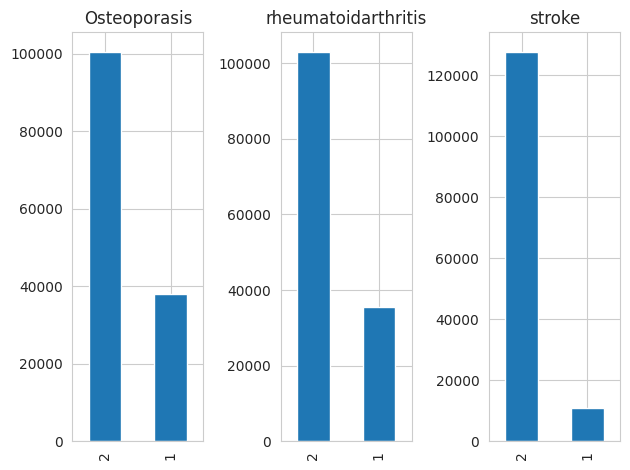

In [ ]:
df = Train_Beneficiarydata

c = ['ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

fig, ax = plt.subplots(1, 3)

order = [2,1]

for i, c in enumerate(df[c]):
    df[c].value_counts().loc[order].plot(kind="bar", ax=ax[i]).set_title(re.sub(r'^.*?_','',c))
fig.tight_layout()
fig.show()

- Default doesn't add any value since there are no 'yes' values, we will drop this field

In [ ]:
Train_Beneficiarydata['Race'].value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

In [ ]:
Train_Beneficiarydata['State'].value_counts()

5     12052
10     9771
45     8780
33     8443
39     6055
14     5923
36     5366
23     5293
34     4629
31     4124
11     3892
49     3623
44     3390
22     3306
15     3272
26     3108
50     2793
52     2662
1      2615
21     2570
42     2524
18     2519
3      2395
24     2165
19     1998
37     1926
4      1817
6      1807
16     1746
25     1622
7      1602
38     1468
17     1339
54     1237
51     1212
20      931
28      905
32      895
46      851
29      752
30      732
13      687
27      538
12      484
43      465
41      438
8       415
47      410
35      304
53      295
9       214
2       196
Name: State, dtype: int64

## Adding new features from EDA

### Beneficiary Data

In [ ]:
# Replacing 2 with 0 for chronic conditions, Zero indicates chronic condition is No

Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2,
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2,
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [ ]:
Train_Beneficiarydata[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]] = Train_Beneficiarydata[["ChronicCond_Alzheimer", "ChronicCond_Heartfailure", "ChronicCond_KidneyDisease", "ChronicCond_Cancer", "ChronicCond_ObstrPulmonary", "ChronicCond_Depression", "ChronicCond_Diabetes", "ChronicCond_IschemicHeart", "ChronicCond_Osteoporasis", "ChronicCond_rheumatoidarthritis", "ChronicCond_stroke", "RenalDiseaseIndicator"]].apply(pd.to_numeric)


In [ ]:
## create risk score
Train_Beneficiarydata['Patient_Risk_Score'] = Train_Beneficiarydata['ChronicCond_Alzheimer'] + Train_Beneficiarydata['ChronicCond_Heartfailure'] + \
                                        Train_Beneficiarydata['ChronicCond_KidneyDisease'] + Train_Beneficiarydata['ChronicCond_Cancer'] +\
                                        Train_Beneficiarydata['ChronicCond_ObstrPulmonary'] + Train_Beneficiarydata['ChronicCond_Depression'] +\
                                    Train_Beneficiarydata['ChronicCond_Diabetes'] + Train_Beneficiarydata['ChronicCond_IschemicHeart'] +\
                                    Train_Beneficiarydata['ChronicCond_Osteoporasis'] + Train_Beneficiarydata['ChronicCond_rheumatoidarthritis'] +\
                                    Train_Beneficiarydata['ChronicCond_stroke'] + Train_Beneficiarydata['RenalDiseaseIndicator']


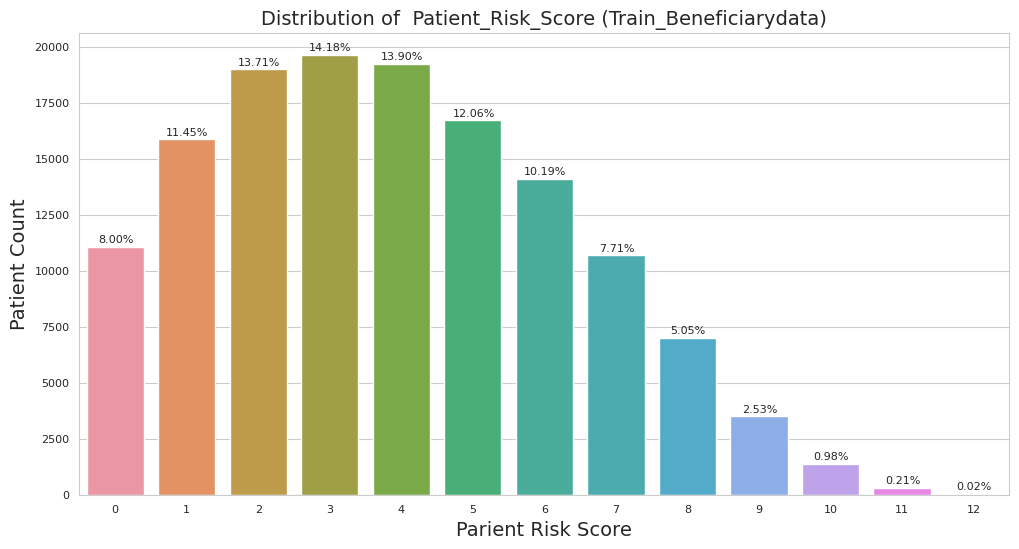

In [ ]:
# Distribition of patient risk score
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Patient_Risk_Score',y=None, data=Train_Beneficiarydata, orient ="v")
plt.title('Distribution of  Patient_Risk_Score (Train_Beneficiarydata)', fontsize=14)
plt.xticks(size = 8)
plt.yticks(size = 8)
plt.xlabel('Parient Risk Score', size = 14)
plt.ylabel('Patient Count', size = 14)
percentage_without_hue(ax, Train_Beneficiarydata['Patient_Risk_Score'], 0.01, 200,8)

In [ ]:
Train_Beneficiarydata['Patient_Risk_Score'].value_counts()

3     19649
4     19257
2     18994
5     16716
1     15868
6     14120
0     11081
7     10686
8      6995
9      3499
10     1362
11      295
12       34
Name: Patient_Risk_Score, dtype: int64

In [ ]:
# Convert Date of Birth and Date of Death from String to Datetime format
Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%Y-%m-%d')

In [ ]:
Train_Beneficiarydata['Birth_Year'] = Train_Beneficiarydata['DOB'].dt.year
Train_Beneficiarydata['Birth_Month'] = Train_Beneficiarydata['DOB'].dt.month

In [ ]:
Train_Beneficiarydata['Patient_Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)
Train_Beneficiarydata.Patient_Age.fillna(round(((pd.to_datetime('2009-12-01',format ='%Y-%m-%d')-Train_Beneficiarydata['DOB']).dt.days)/365),inplace=True)

In [ ]:
Train_Beneficiarydata['isDead'] = 0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(), 'isDead'] = 1

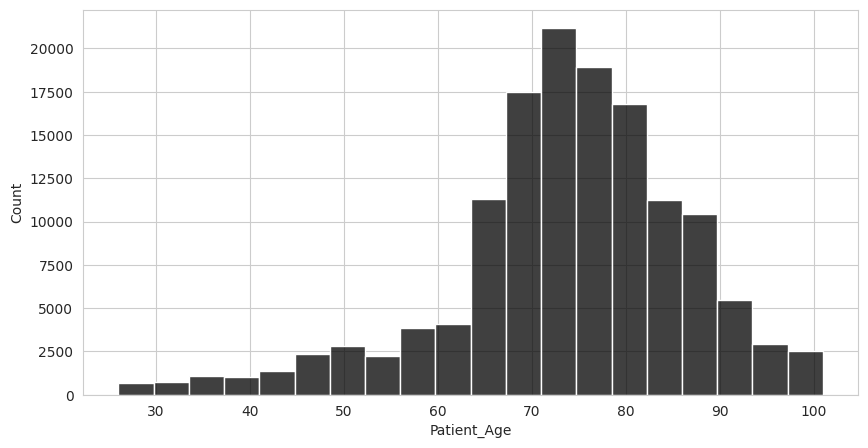

In [ ]:
# Plot distribution of age
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Beneficiarydata['Patient_Age'], kde = False, color ='black', bins = 20)
plt.show()

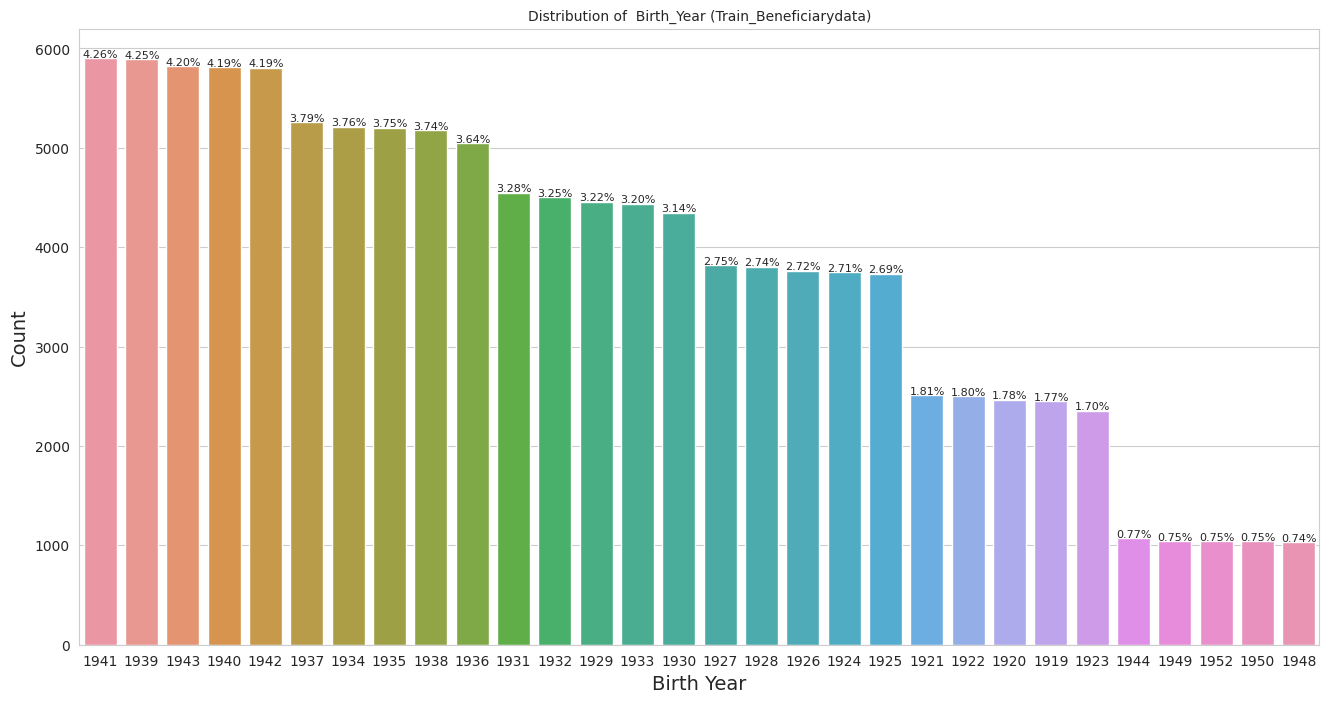

In [ ]:
# Plot top 20 years in terms of patient's birth year count
plt.figure(figsize=(16, 8))
ax = sns.countplot(x='Birth_Year',y=None, data=Train_Beneficiarydata, orient ="v", order = Train_Beneficiarydata['Birth_Year'].value_counts().iloc[:30].index)
plt.title('Distribution of  Birth_Year (Train_Beneficiarydata)', fontsize=10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Birth Year', size = 14)
plt.ylabel('Count', size = 14)
percentage_without_hue(ax, Train_Beneficiarydata['Birth_Year'], 0.01, 10,8)

### Inpatient Data

In [ ]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Inpatientdata['ClaimStartDt'] = pd.to_datetime(Train_Inpatientdata['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['ClaimEndDt'] = pd.to_datetime(Train_Inpatientdata['ClaimEndDt'],format = '%Y-%m-%d')

In [ ]:
# convert AdmissionDt, DischargeDt from string to datetime format
Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')


In [ ]:
# Calculate Hospitalization_Duration = DischargeDt - AdmissionDt
Train_Inpatientdata['Hospitalization_Duration'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1
# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Inpatientdata['Claim_Period'] = ((Train_Inpatientdata['ClaimEndDt'] - Train_Inpatientdata['ClaimStartDt']).dt.days)+1


In [ ]:
Train_Inpatientdata['ExtraClaimDays'] = np.where(Train_Inpatientdata['Claim_Period']>Train_Inpatientdata['Hospitalization_Duration'], Train_Inpatientdata['Claim_Period'] - Train_Inpatientdata['Hospitalization_Duration'], 0)

In [ ]:
# Get the months and year of claim start and claim end
Train_Inpatientdata['ClaimStart_Year'] = Train_Inpatientdata['ClaimStartDt'].dt.year
Train_Inpatientdata['ClaimStart_Month'] = Train_Inpatientdata['ClaimStartDt'].dt.month

Train_Inpatientdata['ClaimEnd_Year'] = Train_Inpatientdata['ClaimEndDt'].dt.year
Train_Inpatientdata['ClaimEnd_Month'] = Train_Inpatientdata['ClaimEndDt'].dt.month

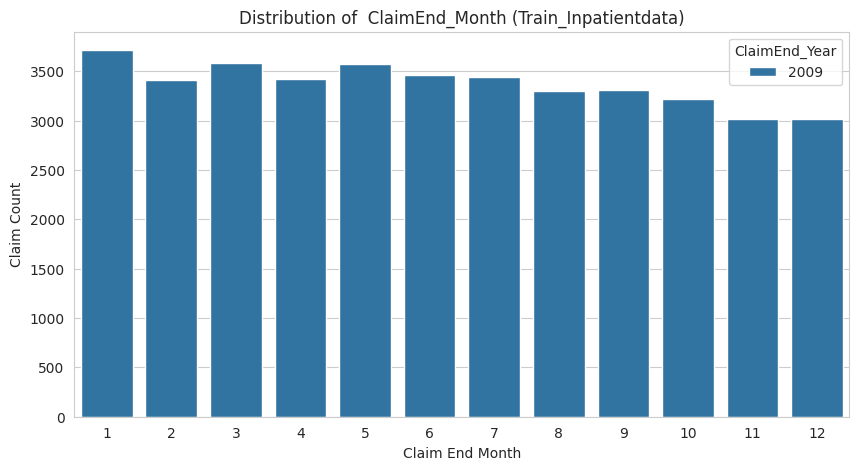

In [ ]:

# Plot distribution of ClaimEnd_Month in Train_Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=Train_Inpatientdata, orient ="v", hue= 'ClaimEnd_Year') #, order = Train_Inpatient['ClaimEnd_Month'].value_counts().index
plt.title('Distribution of  ClaimEnd_Month (Train_Inpatientdata)', fontsize=12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 10)
plt.ylabel('Claim Count', size = 10)
plt.show()

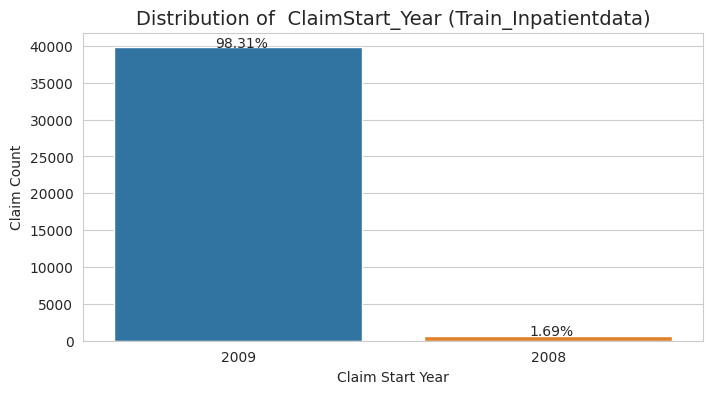

In [ ]:

# Plot distribution of claim start year in Train_Inpatientdata data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=Train_Inpatientdata, orient ="v", order = Train_Inpatientdata['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train_Inpatientdata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 10)
plt.ylabel('Claim Count', size = 10)
percentage_without_hue(ax, Train_Inpatientdata['ClaimStart_Year'], 0.01, 10,10)

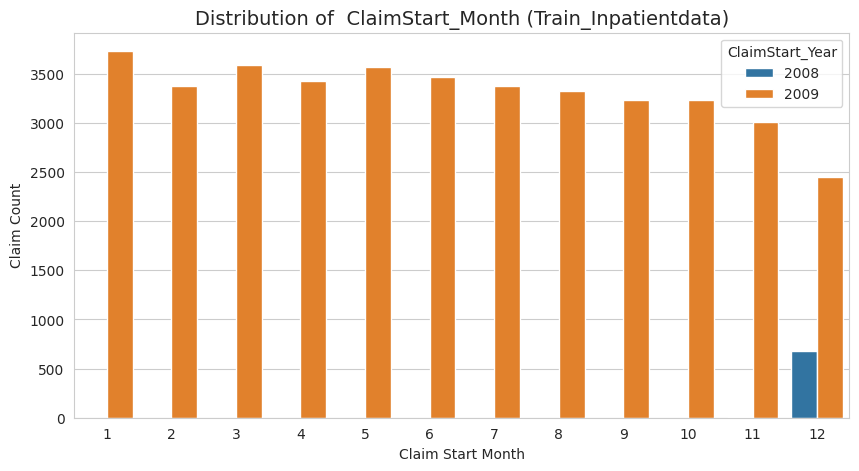

In [ ]:

# Plot distribution of ClaimStart_Month in Train Inpatient data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=Train_Inpatientdata, orient ="v", hue= 'ClaimStart_Year') #, order = Train_Inpatientdata['ClaimStart_Month'].value_counts().index
plt.title('Distribution of  ClaimStart_Month (Train_Inpatientdata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 10)
plt.ylabel('Claim Count', size = 10)
plt.show()

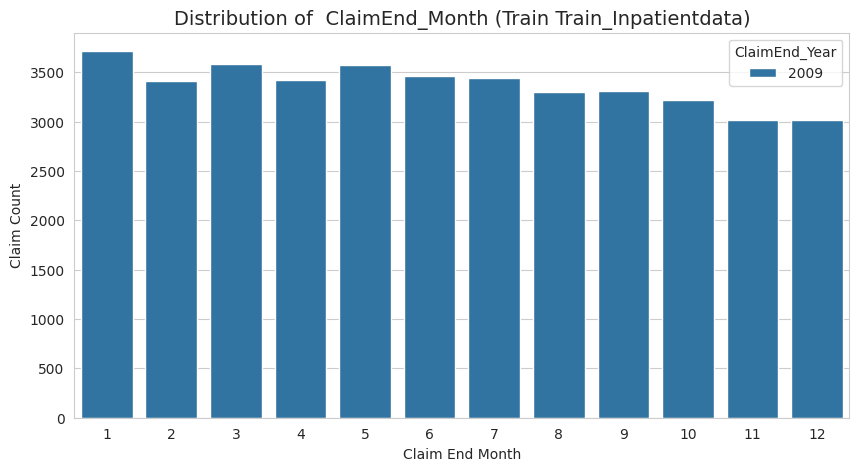

In [ ]:
# Plot distribution of ClaimEnd_Month in Train_Inpatientdata data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=Train_Inpatientdata, orient ="v", hue= 'ClaimEnd_Year') #, order = Train_Inpatientdata['ClaimEnd_Month'].value_counts().index
plt.title('Distribution of  ClaimEnd_Month (Train Train_Inpatientdata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 10)
plt.ylabel('Claim Count', size = 10)
plt.show()

In [ ]:
# Get the month and year of Admission_Year and Admission_Month
Train_Inpatientdata['Admission_Year'] = Train_Inpatientdata['AdmissionDt'].dt.year
Train_Inpatientdata['Admission_Month'] = Train_Inpatientdata['AdmissionDt'].dt.month

Train_Inpatientdata['Discharge_Year'] = Train_Inpatientdata['DischargeDt'].dt.year
Train_Inpatientdata['Discharge_Month'] = Train_Inpatientdata['DischargeDt'].dt.month

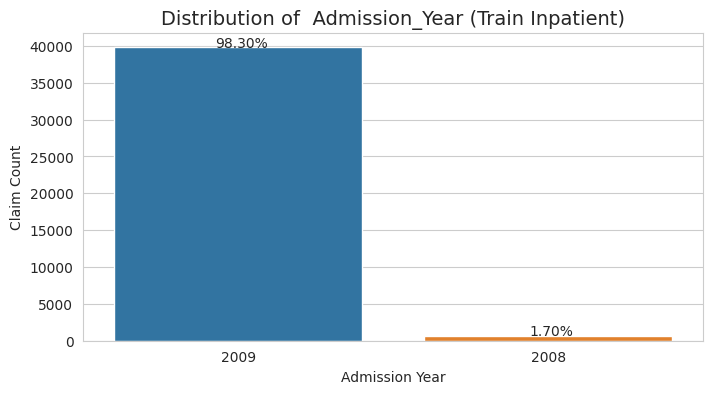

In [ ]:

# Plot distribution of Admission_Year in Train_Inpatientdata data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Admission_Year',y=None, data=Train_Inpatientdata, orient ="v", order = Train_Inpatientdata['Admission_Year'].value_counts().index)
plt.title('Distribution of  Admission_Year (Train Inpatient)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Admission Year', size = 10)
plt.ylabel('Claim Count', size = 10)
percentage_without_hue(ax, Train_Inpatientdata['Admission_Year'], 0.01, 20,10)

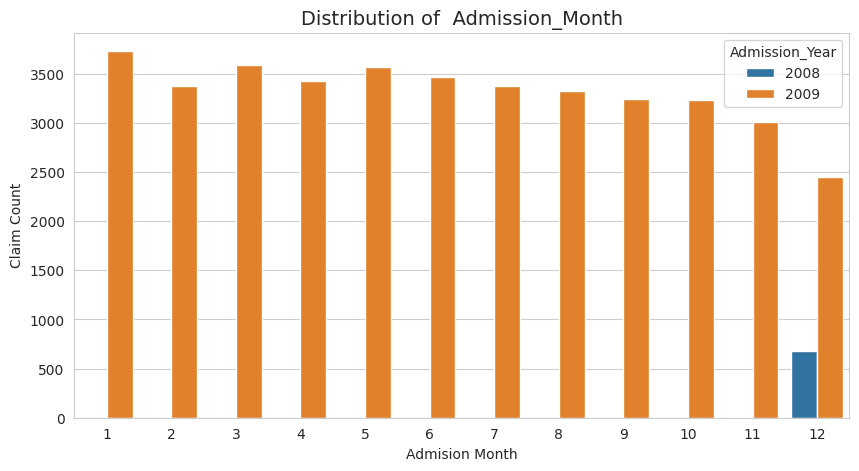

In [ ]:
# Plot distribution of Admission_Month in Train_Inpatientdata data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Admission_Month',y=None, data=Train_Inpatientdata, orient ="v", hue='Admission_Year') #, order = Train_Inpatientdata['Admission_Month'].value_counts().index
plt.title('Distribution of  Admission_Month', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Admision Month', size = 10)
plt.ylabel('Claim Count', size = 10)
plt.show()

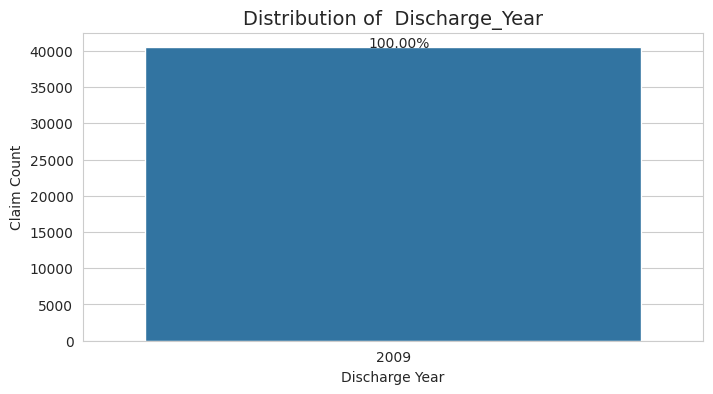

In [ ]:
# Plot inpatient discharge year
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Discharge_Year',y=None, data=Train_Inpatientdata, orient ="v", order = Train_Inpatientdata['Discharge_Year'].value_counts().index)
plt.title('Distribution of  Discharge_Year', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Discharge Year', size = 10)
plt.ylabel('Claim Count', size = 10)
percentage_without_hue(ax, Train_Inpatientdata['Discharge_Year'], 0.01, 20,10)

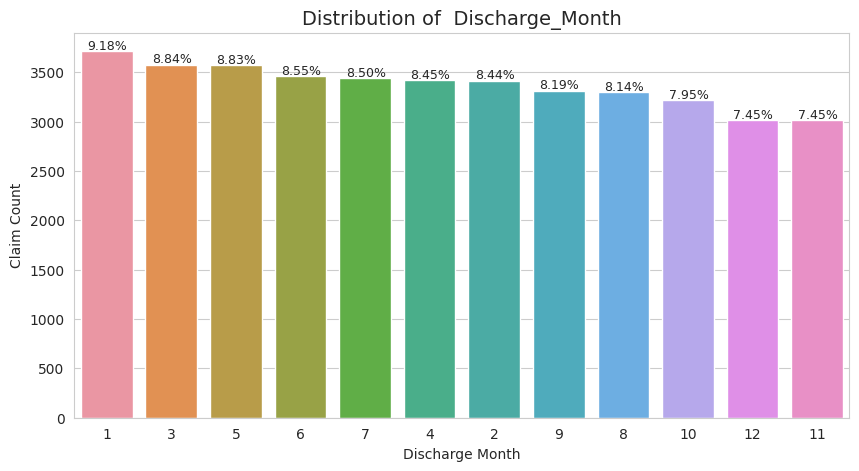

In [ ]:
# Plot discharge month for Train_Inpatientdata data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Discharge_Month',y=None, data=Train_Inpatientdata, orient ="v", order = Train_Inpatientdata['Discharge_Month'].value_counts().index)
plt.title('Distribution of  Discharge_Month', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Discharge Month', size = 10)
plt.ylabel('Claim Count', size = 10)
percentage_without_hue(ax, Train_Inpatientdata['Discharge_Month'], 0.01, 20,9)

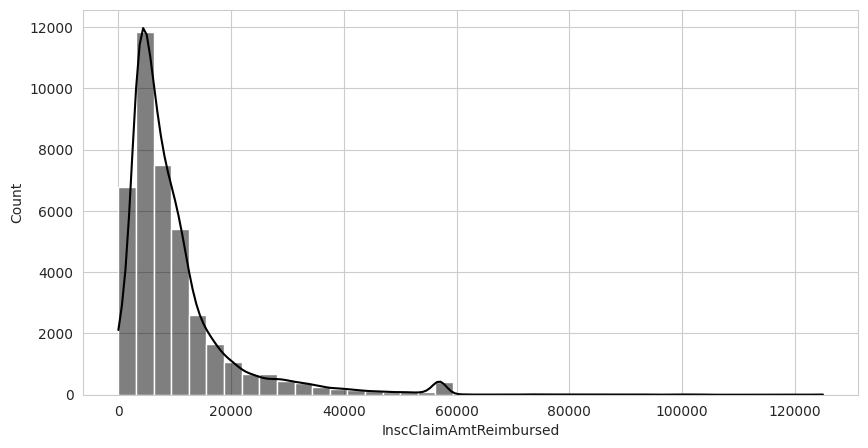

In [ ]:
# Plot the distribution for InscClaimAmtReimbursed
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Inpatientdata['InscClaimAmtReimbursed'], kde = True, color ='black', bins = 40)
plt.show()

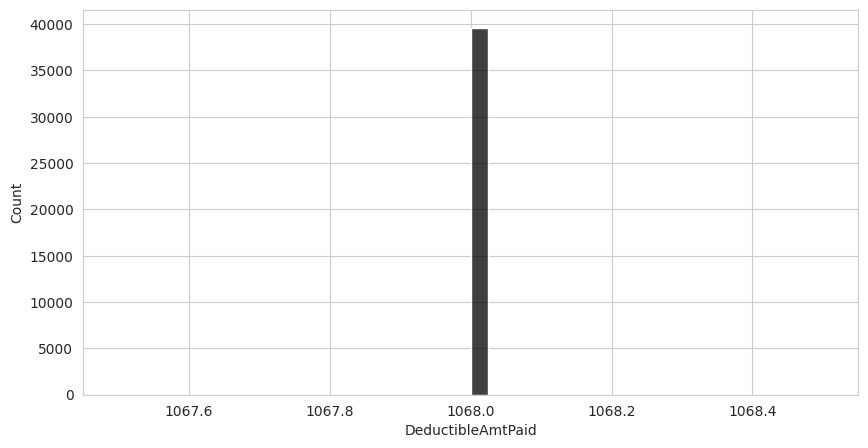

In [ ]:
# Plot the distribution for DeductibleAmtPaid
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Inpatientdata['DeductibleAmtPaid'].dropna(), kde = False, color ='black', bins = 40)
plt.show()

### Outpatient Data

In [ ]:
# convert ClaimStartDt, ClaimEndDt from string to datetime format
Train_Outpatientdata['ClaimStartDt'] = pd.to_datetime(Train_Outpatientdata['ClaimStartDt'] , format = '%Y-%m-%d')
Train_Outpatientdata['ClaimEndDt'] = pd.to_datetime(Train_Outpatientdata['ClaimEndDt'],format = '%Y-%m-%d')

In [ ]:

# Calculate Claim_Period = ClaimEndDt - ClaimStartDt
Train_Outpatientdata['Claim_Period'] = ((Train_Outpatientdata['ClaimEndDt'] - Train_Outpatientdata['ClaimStartDt']).dt.days)+1


In [ ]:
# Get the months and year of claim start and claim end
Train_Outpatientdata['ClaimStart_Year'] = Train_Outpatientdata['ClaimStartDt'].dt.year
Train_Outpatientdata['ClaimStart_Month'] = Train_Outpatientdata['ClaimStartDt'].dt.month

Train_Outpatientdata['ClaimEnd_Year'] = Train_Outpatientdata['ClaimEndDt'].dt.year
Train_Outpatientdata['ClaimEnd_Month'] = Train_Outpatientdata['ClaimEndDt'].dt.month

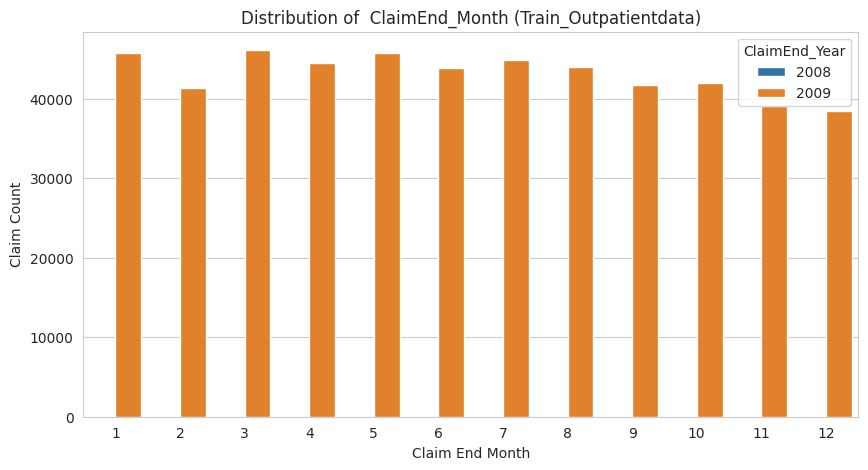

In [ ]:

# Plot distribution of ClaimEnd_Month in Train_Outpatientdata data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=Train_Outpatientdata, orient ="v", hue= 'ClaimEnd_Year') #, order = Train_Inpatient['ClaimEnd_Month'].value_counts().index
plt.title('Distribution of  ClaimEnd_Month (Train_Outpatientdata)', fontsize=12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 10)
plt.ylabel('Claim Count', size = 10)
plt.show()

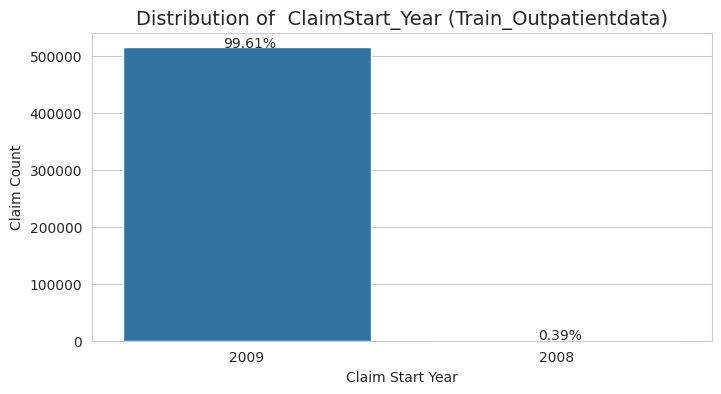

In [ ]:

# Plot distribution of claim start year in Train_Outpatientdata data
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='ClaimStart_Year',y=None, data=Train_Outpatientdata, orient ="v", order = Train_Outpatientdata['ClaimStart_Year'].value_counts().index)
plt.title('Distribution of  ClaimStart_Year (Train_Outpatientdata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Year', size = 10)
plt.ylabel('Claim Count', size = 10)
percentage_without_hue(ax, Train_Outpatientdata['ClaimStart_Year'], 0.01, 10,10)

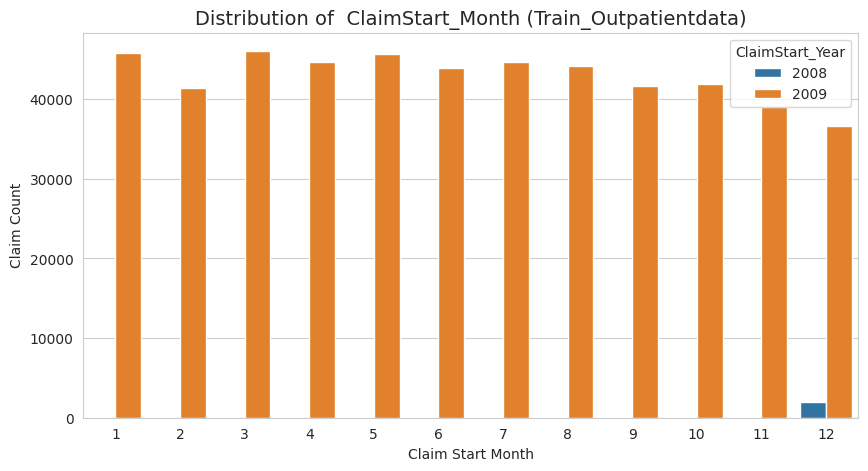

In [ ]:

# Plot distribution of ClaimStart_Month in Train_Outpatientdata data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimStart_Month',y=None, data=Train_Outpatientdata, orient ="v", hue= 'ClaimStart_Year') #, order = Train_Inpatientdata['ClaimStart_Month'].value_counts().index
plt.title('Distribution of  ClaimStart_Month (Train_Outpatientdata)', fontsize=14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim Start Month', size = 10)
plt.ylabel('Claim Count', size = 10)
plt.show()

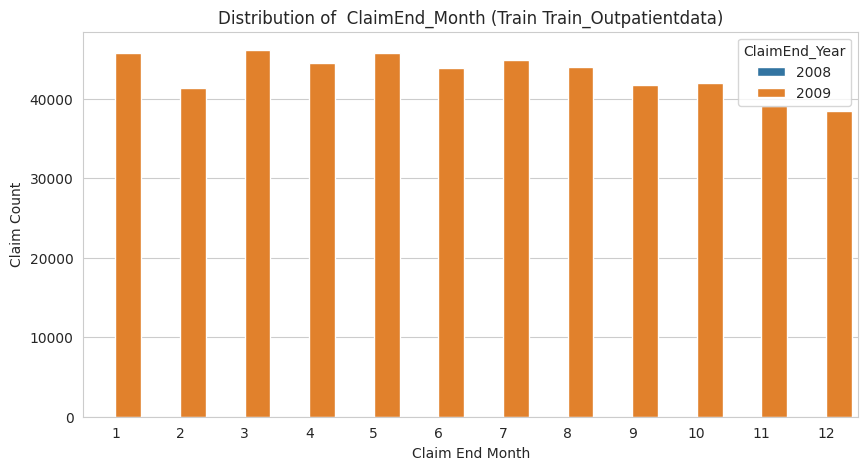

In [ ]:
# Plot distribution of ClaimEnd_Month in Train_Outpatientdata data
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='ClaimEnd_Month',y=None, data=Train_Outpatientdata, orient ="v", hue= 'ClaimEnd_Year') #, order = Train_Inpatientdata['ClaimEnd_Month'].value_counts().index
plt.title('Distribution of  ClaimEnd_Month (Train Train_Outpatientdata)', fontsize=12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Claim End Month', size = 10)
plt.ylabel('Claim Count', size = 10)
plt.show()

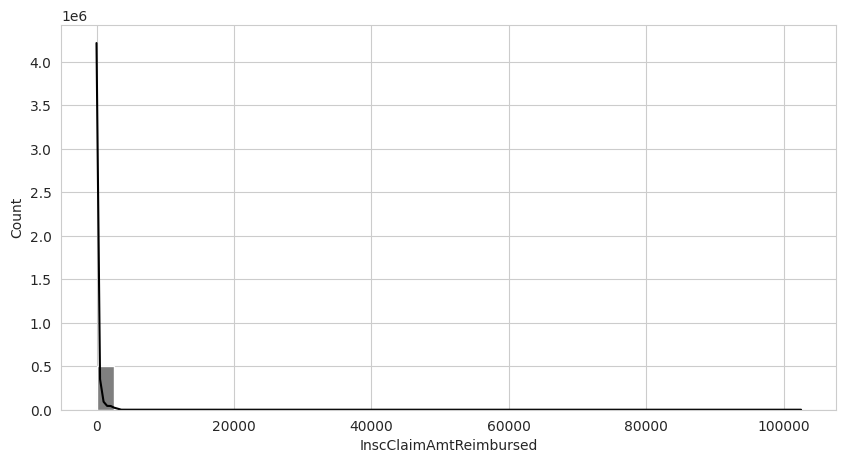

In [ ]:
# Plot the distribution for InscClaimAmtReimbursed
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Outpatientdata['InscClaimAmtReimbursed'], kde = True, color ='black', bins = 40)
plt.show()

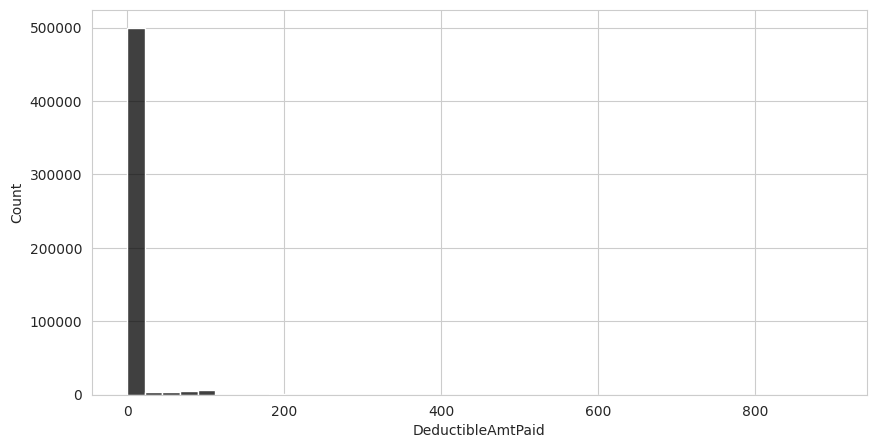

In [ ]:
# Plot the distribution for DeductibleAmtPaid
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(Train_Outpatientdata['DeductibleAmtPaid'].dropna(), kde = False, color ='black', bins = 40)
plt.show()

### Merging Datasets


In [ ]:
Train_Outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'Claim_Period', 'ClaimStart_Year',
       'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month'],
      dtype='object')

In [ ]:
Train_Inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month'],
      dtype='object')

In [ ]:
Train_Beneficiarydata.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Patient_Risk_Score', 'Birth_Year',
       'Birth_Month', 'Patient_Age', 'isDead'],
      dtype='object')

In [ ]:
Train.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

In [ ]:
Train_Inpatientdata['Inpatient_or_Outpatient'] = 1
Train_Outpatientdata['Inpatient_or_Outpatient'] = 0

In [ ]:
common_columns = [ idx for idx in Train_Outpatientdata.columns if idx in Train_Inpatientdata.columns]
print(common_columns)
Patient_Merge = pd.merge(Train_Inpatientdata, Train_Outpatientdata, left_on = common_columns, right_on = common_columns,how = 'outer')

['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'Claim_Period', 'ClaimStart_Year', 'ClaimStart_Month', 'ClaimEnd_Year', 'ClaimEnd_Month', 'Inpatient_or_Outpatient']


In [ ]:
Patient_Bene_Merge = pd.merge(Patient_Merge, Train_Beneficiarydata,
                                                  left_on='BeneID',right_on='BeneID',how='inner')

In [ ]:
Complete_Train = pd.merge(Patient_Bene_Merge, Train , how = 'inner', on = 'Provider' )


In [ ]:
Complete_Train.shape


(558211, 72)

In [ ]:
Complete_Train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Hospitalization_Duration', 'Claim_Period',
       'ExtraClaimDays', 'ClaimStart_Year', 'ClaimStart_Month',
       'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month',
       'Discharge_Year', 'Discharge_Month', 'Inpatient_or_Outpatient', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State

### Data Quality Checks

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [ ]:
# Check the data types of each column

Complete_Train.dtypes

BeneID                                     object
ClaimID                                    object
ClaimStartDt                       datetime64[ns]
ClaimEndDt                         datetime64[ns]
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDiagnosisCode_6                         object


In [ ]:
# almost all fields have nulls that need to be dealt with
# identify quantity of missing values in each column

Complete_Train.isnull().sum(axis = 0)

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [ ]:
# Making the missing data into a percentage of the total data

Complete_Train.isnull().mean().round(4)*100

BeneID                               0.00
ClaimID                              0.00
ClaimStartDt                         0.00
ClaimEndDt                           0.00
Provider                             0.00
InscClaimAmtReimbursed               0.00
AttendingPhysician                   0.27
OperatingPhysician                  79.50
OtherPhysician                      64.22
AdmissionDt                         92.75
ClmAdmitDiagnosisCode               73.86
DeductibleAmtPaid                    0.16
DischargeDt                         92.75
DiagnosisGroupCode                  92.75
ClmDiagnosisCode_1                   1.87
ClmDiagnosisCode_2                  35.04
ClmDiagnosisCode_3                  56.46
ClmDiagnosisCode_4                  70.52
ClmDiagnosisCode_5                  79.95
ClmDiagnosisCode_6                  84.88
ClmDiagnosisCode_7                  88.14
ClmDiagnosisCode_8                  90.43
ClmDiagnosisCode_9                  92.51
ClmDiagnosisCode_10               

### Check Expected Values


In [ ]:
# transpose the dataset description to easily view all columns

Complete_Train.describe(include = 'all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
BeneID,558211,138556,BENE42721,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimID,558211,558211,CLM46614,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimStartDt,558211,NaN,NaN,NaN,2009-06-24 23:39:21.603766272,2008-11-27 00:00:00,2009-03-27 00:00:00,2009-06-23 00:00:00,2009-09-22 00:00:00,2009-12-31 00:00:00,NaN
ClaimEndDt,558211,NaN,NaN,NaN,2009-06-26 17:07:35.601913600,2008-12-28 00:00:00,2009-03-29 00:00:00,2009-06-24 00:00:00,2009-09-23 00:00:00,2009-12-31 00:00:00,NaN
Provider,558211,5410,PRV51459,8240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,558211.0,NaN,NaN,NaN,997.012133,0.0,40.0,80.0,300.0,125000.0,3821.534891
AttendingPhysician,556703,82063,PHY330576,2534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingPhysician,114447,35315,PHY330576,424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OtherPhysician,199736,46457,PHY412132,1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdmissionDt,40474,NaN,NaN,NaN,2009-06-19 17:38:12.493946880,2008-11-27 00:00:00,2009-03-20 00:00:00,2009-06-16 00:00:00,2009-09-17 00:00:00,2009-12-31 00:00:00,NaN


In [ ]:
# Check the data values in each row against expected values

for i in list(Complete_Train.columns):
  print("\n\n", i ,": \n",Complete_Train[i].unique())

# Everything seems to match correctly

# use value counts
# move this to later



 BeneID : 
 ['BENE11001' 'BENE16973' 'BENE17521' ... 'BENE138363' 'BENE157238'
 'BENE153476']


 ClaimID : 
 ['CLM46614' 'CLM565430' 'CLM34721' ... 'CLM460770' 'CLM306999' 'CLM589654']


 ClaimStartDt : 
 ['2009-04-12T00:00:00.000000000' '2009-09-06T00:00:00.000000000'
 '2009-01-20T00:00:00.000000000' '2009-10-17T00:00:00.000000000'
 '2009-10-25T00:00:00.000000000' '2009-01-08T00:00:00.000000000'
 '2009-05-22T00:00:00.000000000' '2009-06-22T00:00:00.000000000'
 '2009-03-11T00:00:00.000000000' '2009-02-10T00:00:00.000000000'
 '2009-05-06T00:00:00.000000000' '2009-12-01T00:00:00.000000000'
 '2009-12-25T00:00:00.000000000' '2009-01-24T00:00:00.000000000'
 '2009-12-07T00:00:00.000000000' '2009-01-03T00:00:00.000000000'
 '2009-06-27T00:00:00.000000000' '2009-04-09T00:00:00.000000000'
 '2009-12-09T00:00:00.000000000' '2009-09-01T00:00:00.000000000'
 '2008-12-30T00:00:00.000000000' '2009-04-01T00:00:00.000000000'
 '2009-11-11T00:00:00.000000000' '2009-12-06T00:00:00.000000000'
 '2009-09-21T

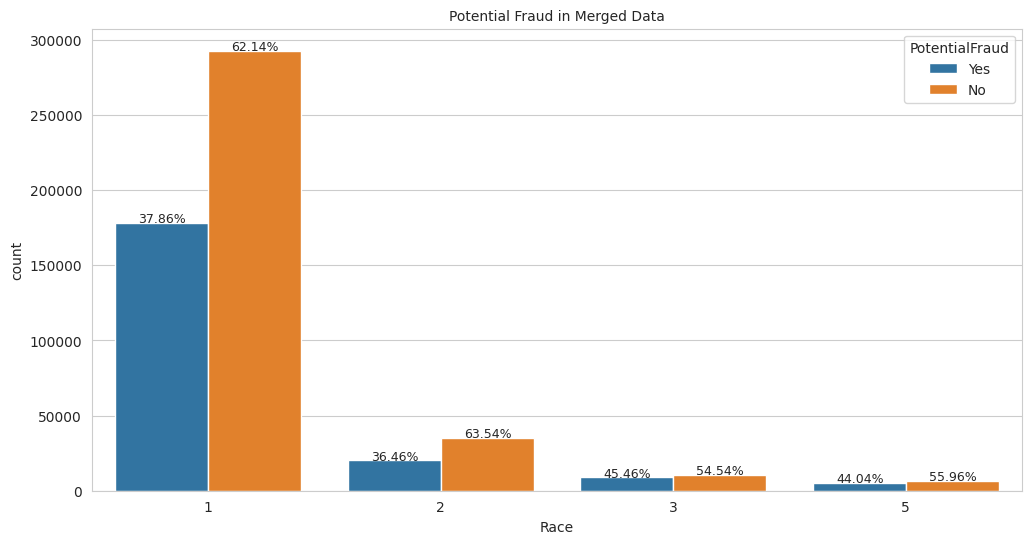

In [ ]:
# Distribution of race in Overall data
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Race',y=None, data=Complete_Train, hue="PotentialFraud", orient ="v",hue_order=['Yes','No'], order = Complete_Train['Race'].value_counts().index)
plt.title('Potential Fraud in Merged Data', size = 10)
percentage_with_hue(ax, Complete_Train.Race, 4,2,-0.1,200, 9)

In [ ]:
# Check for NaN values
Complete_Train.columns[Complete_Train.isnull().any()].tolist()

['AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'AdmissionDt',
 'ClmAdmitDiagnosisCode',
 'DeductibleAmtPaid',
 'DischargeDt',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'Hospitalization_Duration',
 'ExtraClaimDays',
 'Admission_Year',
 'Admission_Month',
 'Discharge_Year',
 'Discharge_Month',
 'DOD']

In [ ]:
# Fill missing results using 0
Complete_Train = Complete_Train.fillna(0).copy()

In [ ]:
# Check for NaN values after filling NaN
Complete_Train.columns[Complete_Train.isnull().any()].tolist()

[]

In [ ]:
remove=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                'ClmDiagnosisCode_1','ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4','ClmDiagnosisCode_5',
                'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7','ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3','ClmProcedureCode_4', 'ClmProcedureCode_5',
                'ClmProcedureCode_6','ClmAdmitDiagnosisCode', 'AdmissionDt','ClaimStart_Year', 'ClaimStart_Year', 'ClaimStart_Month',
                'ClaimEnd_Year', 'ClaimEnd_Month', 'Admission_Year', 'Admission_Month', 'Discharge_Year', 'Discharge_Month',
                'DischargeDt', 'DiagnosisGroupCode','DOB', 'DOD','Birth_Year', 'Birth_Month','State', 'County']


In [ ]:
Complete_Train_Final = Complete_Train.drop(columns=remove, axis=1)

In [ ]:
# Validate drops
Complete_Train_Final.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Provider,558211,5410,PRV51459,8240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,558211.0,NaN,NaN,NaN,997.012133,3821.534891,0.0,40.0,80.0,300.0,125000.0
DeductibleAmtPaid,558211.0,NaN,NaN,NaN,78.294788,273.814128,0.0,0.0,0.0,0.0,1068.0
Hospitalization_Duration,558211.0,NaN,NaN,NaN,0.483269,2.300583,0.0,0.0,0.0,0.0,36.0
Claim_Period,558211.0,NaN,NaN,NaN,2.72794,4.904984,1.0,1.0,1.0,1.0,37.0
ExtraClaimDays,558211.0,NaN,NaN,NaN,0.000066,0.012907,0.0,0.0,0.0,0.0,3.0
Inpatient_or_Outpatient,558211.0,NaN,NaN,NaN,0.072507,0.259325,0.0,0.0,0.0,0.0,1.0
Gender,558211.0,NaN,NaN,NaN,1.578838,0.493746,1.0,1.0,2.0,2.0,2.0
Race,558211.0,NaN,NaN,NaN,1.255011,0.717437,1.0,1.0,1.0,1.0,5.0
RenalDiseaseIndicator,558211.0,NaN,NaN,NaN,0.196786,0.397569,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Converting gender and race to categorical

Complete_Train_Final.Gender = Complete_Train_Final.Gender.astype('category')
Complete_Train_Final.Race = Complete_Train_Final.Race.astype('category')


In [ ]:
Complete_Train_Final.dtypes

Provider                             object
InscClaimAmtReimbursed                int64
DeductibleAmtPaid                   float64
Hospitalization_Duration            float64
Claim_Period                          int64
ExtraClaimDays                      float64
Inpatient_or_Outpatient               int64
Gender                             category
Race                               category
RenalDiseaseIndicator                 int64
NoOfMonths_PartACov                   int64
NoOfMonths_PartBCov                   int64
ChronicCond_Alzheimer                 int64
ChronicCond_Heartfailure              int64
ChronicCond_KidneyDisease             int64
ChronicCond_Cancer                    int64
ChronicCond_ObstrPulmonary            int64
ChronicCond_Depression                int64
ChronicCond_Diabetes                  int64
ChronicCond_IschemicHeart             int64
ChronicCond_Osteoporasis              int64
ChronicCond_rheumatoidarthritis       int64
ChronicCond_stroke              

## Split Test & Train Data

### Import Packages

### Split Target from Features

In [ ]:
# seperate target dataframe from starting_data dataframe

target_data = Complete_Train_Final['PotentialFraud']

target_data = pd.DataFrame(target_data)
target_data.head()

,PotentialFraud
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [ ]:
# seperate dataframe for feature columns

features_data = Complete_Train_Final.drop(columns = 'PotentialFraud')
features_data.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead
0,PRV55912,26000,1068.0,7.0,7,0.0,1,1,1,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,67.0,0
1,PRV55912,50,0.0,0.0,1,0.0,0,1,1,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,4,78.0,0
2,PRV55912,19000,1068.0,13.0,13,0.0,1,2,1,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,5,96.0,0
3,PRV55912,17000,1068.0,19.0,19,0.0,1,1,1,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,2,87.0,0
4,PRV55912,13000,1068.0,5.0,5,0.0,1,2,1,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,6,79.0,0


In [ ]:
Complete_Train_Final.head(5)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PotentialFraud
0,PRV55912,26000,1068.0,7.0,7,0.0,1,1,1,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,67.0,0,Yes
1,PRV55912,50,0.0,0.0,1,0.0,0,1,1,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,4,78.0,0,Yes
2,PRV55912,19000,1068.0,13.0,13,0.0,1,2,1,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,5,96.0,0,Yes
3,PRV55912,17000,1068.0,19.0,19,0.0,1,1,1,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,2,87.0,0,Yes
4,PRV55912,13000,1068.0,5.0,5,0.0,1,2,1,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,6,79.0,0,Yes


In [ ]:
# drop provider

features_data = features_data.drop(columns = 'Provider')
features_data.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead
0,26000,1068.0,7.0,7,0.0,1,1,1,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,67.0,0
1,50,0.0,0.0,1,0.0,0,1,1,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,4,78.0,0
2,19000,1068.0,13.0,13,0.0,1,2,1,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,5,96.0,0
3,17000,1068.0,19.0,19,0.0,1,1,1,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,2,87.0,0
4,13000,1068.0,5.0,5,0.0,1,2,1,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,6,79.0,0


In [ ]:
## OHE for Race and Gender
features_data=pd.get_dummies(features_data,columns=['Gender','Race'])
features_data.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,26000,1068.0,7.0,7,0.0,1,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,67.0,0,1,0,1,0,0,0
1,50,0.0,0.0,1,0.0,0,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,4,78.0,0,1,0,1,0,0,0
2,19000,1068.0,13.0,13,0.0,1,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,5,96.0,0,0,1,1,0,0,0
3,17000,1068.0,19.0,19,0.0,1,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,2,87.0,0,1,0,1,0,0,0
4,13000,1068.0,5.0,5,0.0,1,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,6,79.0,0,0,1,1,0,0,0


## Outlier Handling, Scaling, and Normalization

### Splitting categorical and continuous data

In [ ]:
features_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,558211.0,997.012133,3821.534891,0.0,40.0,80.0,300.0,125000.0
DeductibleAmtPaid,558211.0,78.294788,273.814128,0.0,0.0,0.0,0.0,1068.0
Hospitalization_Duration,558211.0,0.483269,2.300583,0.0,0.0,0.0,0.0,36.0
Claim_Period,558211.0,2.727940,4.904984,1.0,1.0,1.0,1.0,37.0
ExtraClaimDays,558211.0,0.000066,0.012907,0.0,0.0,0.0,0.0,3.0
Inpatient_or_Outpatient,558211.0,0.072507,0.259325,0.0,0.0,0.0,0.0,1.0
RenalDiseaseIndicator,558211.0,0.196786,0.397569,0.0,0.0,0.0,0.0,1.0
NoOfMonths_PartACov,558211.0,11.931472,0.889712,0.0,12.0,12.0,12.0,12.0
NoOfMonths_PartBCov,558211.0,11.938770,0.785900,0.0,12.0,12.0,12.0,12.0
ChronicCond_Alzheimer,558211.0,0.401868,0.490276,0.0,0.0,0.0,1.0,1.0


In [ ]:
feat_cat = ['Inpatient_or_Outpatient','RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease',
            'ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes',
            'ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke',
            'isDead','Gender_1','Gender_2','Race_1','Race_2','Race_3','Race_5']

In [ ]:
feat_cat

['Inpatient_or_Outpatient',
 'RenalDiseaseIndicator',
 'ChronicCond_Alzheimer',
 'ChronicCond_Heartfailure',
 'ChronicCond_KidneyDisease',
 'ChronicCond_Cancer',
 'ChronicCond_ObstrPulmonary',
 'ChronicCond_Depression',
 'ChronicCond_Diabetes',
 'ChronicCond_IschemicHeart',
 'ChronicCond_Osteoporasis',
 'ChronicCond_rheumatoidarthritis',
 'ChronicCond_stroke',
 'isDead',
 'Gender_1',
 'Gender_2',
 'Race_1',
 'Race_2',
 'Race_3',
 'Race_5']

In [ ]:
X_train_cat = features_data[feat_cat]

In [ ]:
X_train_cat.head(5)

,Inpatient_or_Outpatient,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,isDead,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,1,0,1,0,1,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0
1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0


In [ ]:
X_train_con = features_data.drop(columns=feat_cat)


In [ ]:
X_train_con.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age
0,26000,1068.0,7.0,7,0.0,12,12,36000,3204,60,70,7,67.0
1,50,0.0,0.0,1,0.0,12,12,24000,2136,450,200,4,78.0
2,19000,1068.0,13.0,13,0.0,12,12,19000,1068,100,20,5,96.0
3,17000,1068.0,19.0,19,0.0,12,12,17000,1068,1050,540,2,87.0
4,13000,1068.0,5.0,5,0.0,12,12,27000,2136,450,160,6,79.0


### Import Packages

In this section, we define each of the methods we will be using to manage outliers, scale the data, and standardize the distribution curve. We will use these functions to later tweak the data pipeline, which will help us yield the best results later on.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats as stats


In [ ]:
X_train_con.isna().any()

InscClaimAmtReimbursed      False
DeductibleAmtPaid           False
Hospitalization_Duration    False
Claim_Period                False
ExtraClaimDays              False
NoOfMonths_PartACov         False
NoOfMonths_PartBCov         False
IPAnnualReimbursementAmt    False
IPAnnualDeductibleAmt       False
OPAnnualReimbursementAmt    False
OPAnnualDeductibleAmt       False
Patient_Risk_Score          False
Patient_Age                 False
dtype: bool

### Functions

Notes:

One function for std dev and xbar transform

Save updates to new dataframes not the same dataframe
Create copies of dataframes

In [ ]:
# Powertransform


def pt_yeo(df):
    headers = list(df)
    pt = PowerTransformer(method='yeo-johnson', standardize=False)
    df = pt.fit_transform(df)
    df = pd.DataFrame(df)
    nums = df.columns
    rename_cols = dict(zip(nums, headers))
    df = df.rename(columns=rename_cols)
    return df

In [ ]:
# Standardize data

def standard(df):
    scaler = StandardScaler()
    df_scale = scaler.fit_transform(df)
    #ind=df.index
    cols = df.columns
    df_scale = pd.DataFrame(df_scale, index=df.index, columns=cols) #(df_scale, index=ind, columns=cols)
    return df_scale

In [ ]:
# Minmax scaler to normalize between 1 and 0

def minmax(df):
    headers = list(df)
    s_scaler = MinMaxScaler()
    scaled = s_scaler.fit_transform(df)
    df = pd.DataFrame(scaled)
    nums = df.columns
    rename_cols = dict(zip(nums, headers))
    df = df.rename(columns=rename_cols)
    return df

In [ ]:
def robust(df):
    scaler = RobustScaler()
    df_scale = scaler.fit_transform(df)
    #ind=df.index
    cols = df.columns
    df_scale = pd.DataFrame(df_scale, index=df.index, columns=cols) #(df_scale, index=ind, columns=cols)
    return df_scale

### Running Functions

####Applying the functions above to **X_train_con**

In [ ]:
X_train_con.describe().T

,count,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,558211.0,997.012133,3821.534891,0.0,40.0,80.0,300.0,125000.0
DeductibleAmtPaid,558211.0,78.294788,273.814128,0.0,0.0,0.0,0.0,1068.0
Hospitalization_Duration,558211.0,0.483269,2.300583,0.0,0.0,0.0,0.0,36.0
Claim_Period,558211.0,2.727940,4.904984,1.0,1.0,1.0,1.0,37.0
ExtraClaimDays,558211.0,0.000066,0.012907,0.0,0.0,0.0,0.0,3.0
NoOfMonths_PartACov,558211.0,11.931472,0.889712,0.0,12.0,12.0,12.0,12.0
NoOfMonths_PartBCov,558211.0,11.938770,0.785900,0.0,12.0,12.0,12.0,12.0
IPAnnualReimbursementAmt,558211.0,5227.971466,11786.274732,-8000.0,0.0,0.0,6000.0,161470.0
IPAnnualDeductibleAmt,558211.0,568.756807,1179.172616,0.0,0.0,0.0,1068.0,38272.0
OPAnnualReimbursementAmt,558211.0,2278.225348,3881.846386,-70.0,460.0,1170.0,2590.0,102960.0


In [ ]:
X_train_con.skew()
#drop pdays
#check only cont features, and all cont features

InscClaimAmtReimbursed        9.491424
DeductibleAmtPaid             3.327427
Hospitalization_Duration      7.696463
Claim_Period                  3.159962
ExtraClaimDays              210.756945
NoOfMonths_PartACov         -13.135232
NoOfMonths_PartBCov         -13.958267
IPAnnualReimbursementAmt      3.994150
IPAnnualDeductibleAmt         8.156711
OPAnnualReimbursementAmt      5.516594
OPAnnualDeductibleAmt         4.356274
Patient_Risk_Score            0.092599
Patient_Age                  -0.830820
dtype: float64

In [ ]:
X_train_con_r = robust(X_train_con)

In [ ]:
X_train_con_r.skew()

InscClaimAmtReimbursed        9.491424
DeductibleAmtPaid             3.327427
Hospitalization_Duration      7.696463
Claim_Period                  3.159962
ExtraClaimDays              210.756945
NoOfMonths_PartACov         -13.135232
NoOfMonths_PartBCov         -13.958267
IPAnnualReimbursementAmt      3.994150
IPAnnualDeductibleAmt         8.156711
OPAnnualReimbursementAmt      5.516594
OPAnnualDeductibleAmt         4.356274
Patient_Risk_Score            0.092599
Patient_Age                  -0.830820
dtype: float64

In [ ]:
X_train_con_pt = pt_yeo(X_train_con_r)

In [ ]:
X_train_con_pt.skew()

InscClaimAmtReimbursed        0.614293
DeductibleAmtPaid             2.516339
Hospitalization_Duration      3.296983
Claim_Period                  1.626864
ExtraClaimDays              181.199111
NoOfMonths_PartACov         -12.529917
NoOfMonths_PartBCov         -11.271052
IPAnnualReimbursementAmt      0.740876
IPAnnualDeductibleAmt         0.712468
OPAnnualReimbursementAmt      0.209944
OPAnnualDeductibleAmt         0.211923
Patient_Risk_Score            0.022414
Patient_Age                   0.008404
dtype: float64

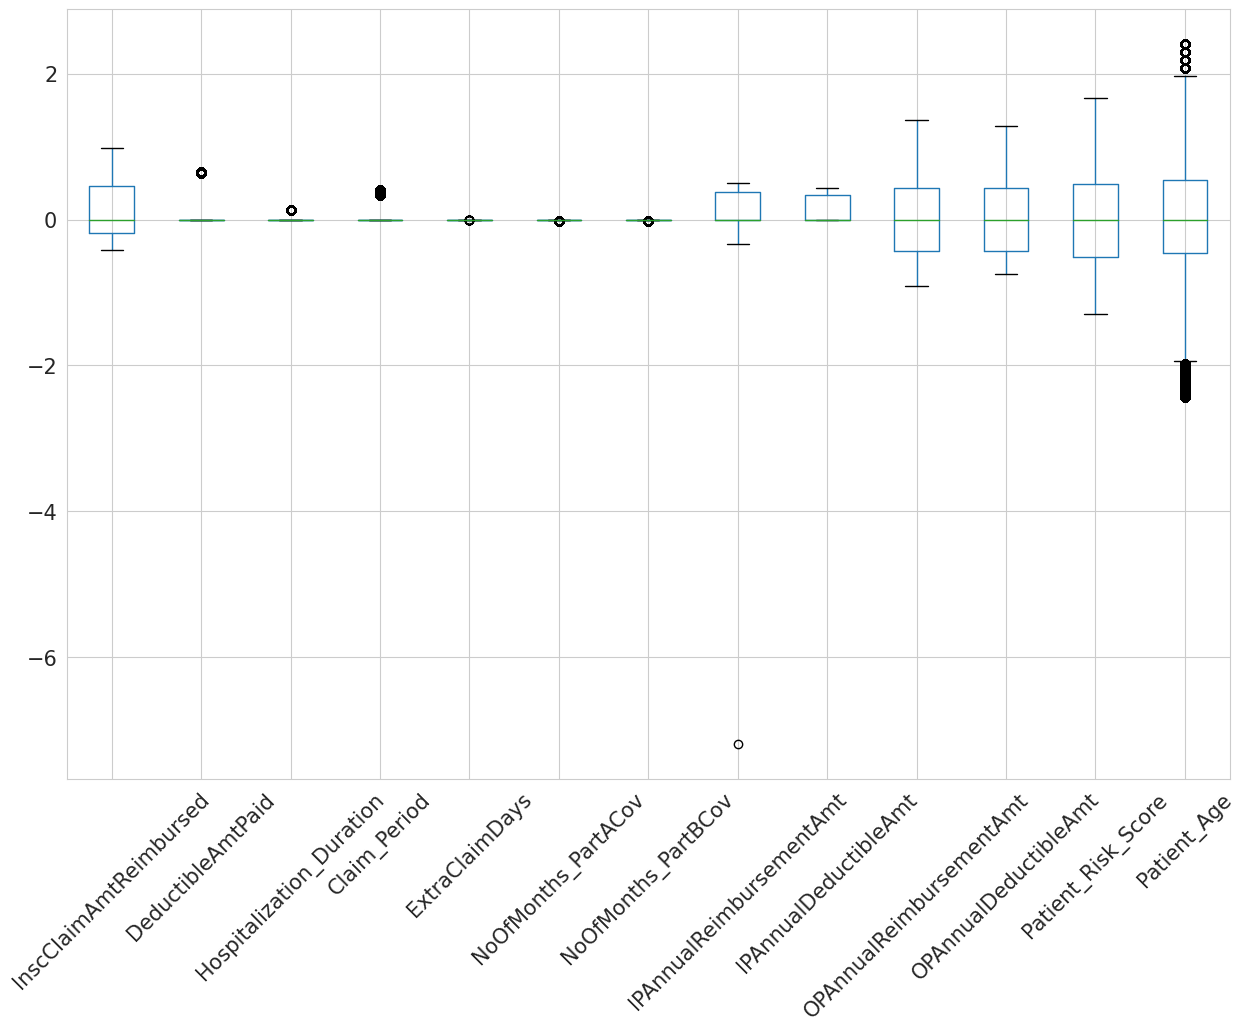

In [ ]:
bxplt_pre = X_train_con_pt.boxplot(rot=45, fontsize=15, figsize = (15,10))

In [ ]:
X_train_con_pt.describe().T

,count,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,558211.0,1.476653e-01,4.207405e-01,-0.413512,-0.179042,0.0,0.455460,0.975886
DeductibleAmtPaid,558211.0,7.067533e-02,2.025052e-01,-0.000000,-0.000000,0.0,-0.000000,0.651723
Hospitalization_Duration,558211.0,9.758243e-03,3.490107e-02,-0.000000,-0.000000,0.0,-0.000000,0.134601
Claim_Period,558211.0,7.270410e-02,1.521230e-01,-0.000000,-0.000000,0.0,-0.000000,0.406114
ExtraClaimDays,558211.0,1.033889e-09,1.873451e-07,-0.000000,-0.000000,0.0,-0.000000,0.000034
NoOfMonths_PartACov,558211.0,-9.504330e-05,1.198420e-03,-0.015206,0.000000,0.0,0.000000,0.000000
NoOfMonths_PartBCov,558211.0,-1.204667e-04,1.368389e-03,-0.015664,0.000000,0.0,0.000000,0.000000
IPAnnualReimbursementAmt,558211.0,1.367706e-01,1.986657e-01,-7.195702,-0.000000,0.0,0.374212,0.497429
IPAnnualDeductibleAmt,558211.0,1.228657e-01,1.725475e-01,-0.000000,-0.000000,0.0,0.343425,0.428254
OPAnnualReimbursementAmt,558211.0,1.702727e-02,5.214101e-01,-0.903994,-0.433860,0.0,0.431080,1.358875


In [ ]:
X_train_con_minmax = minmax(X_train_con_pt)

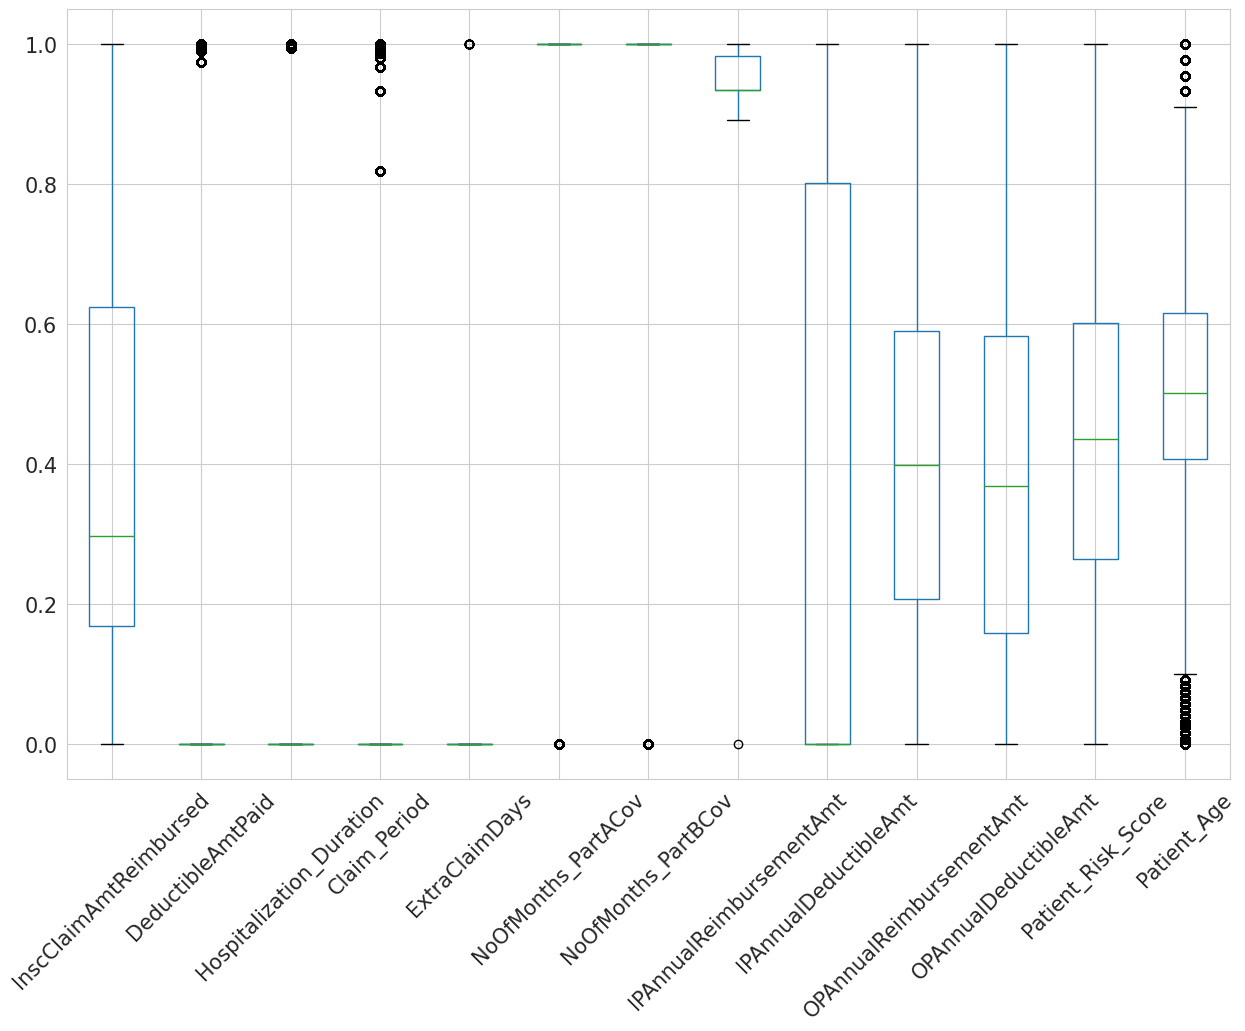

In [ ]:
bxplt_pre = X_train_con_minmax.boxplot(rot=45, fontsize=15, figsize = (15,10))

In [ ]:
X_train_con_final = X_train_con_minmax

In [ ]:
X_train_con_final.describe().T
#also do assert or boxplot

,count,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,558211.0,0.403899,0.302822,0.0,0.168756,0.297619,0.625431,1.0
DeductibleAmtPaid,558211.0,0.108444,0.310723,0.0,0.000000,0.000000,0.000000,1.0
Hospitalization_Duration,558211.0,0.072498,0.259293,0.0,0.000000,0.000000,0.000000,1.0
Claim_Period,558211.0,0.179024,0.374582,0.0,0.000000,0.000000,0.000000,1.0
ExtraClaimDays,558211.0,0.000030,0.005518,0.0,0.000000,0.000000,0.000000,1.0
NoOfMonths_PartACov,558211.0,0.993750,0.078812,0.0,1.000000,1.000000,1.000000,1.0
NoOfMonths_PartBCov,558211.0,0.992309,0.087359,0.0,1.000000,1.000000,1.000000,1.0
IPAnnualReimbursementAmt,558211.0,0.953119,0.025824,0.0,0.935341,0.935341,0.983984,1.0
IPAnnualDeductibleAmt,558211.0,0.286899,0.402909,0.0,0.000000,0.000000,0.801918,1.0
OPAnnualReimbursementAmt,558211.0,0.407015,0.230420,0.0,0.207760,0.399490,0.589992,1.0


## Merge Dataframes

Merge OHE dataframes with continous dataframes

In [ ]:
X_train_con_final.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age
0,0.994980,1.0,1.000000,0.991831,0.0,1.0,1.0,0.998780,0.960906,0.056535,0.097009,0.602524,0.395268
1,0.204499,0.0,0.000000,0.000000,0.0,1.0,1.0,0.997524,0.923266,0.204382,0.247252,0.351837,0.548797
2,0.992624,1.0,1.000000,0.998328,0.0,1.0,1.0,0.996393,0.801918,0.073183,0.028919,0.436861,0.889586
3,0.991593,1.0,1.000000,0.999427,0.0,1.0,1.0,0.995721,0.801918,0.373397,0.487284,0.177925,0.707005
4,0.988580,1.0,0.999998,0.981119,0.0,1.0,1.0,0.997969,0.923266,0.204382,0.205000,0.520349,0.564990


In [ ]:
X_train_con_final.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace=True)

X_train_complete = pd.concat([X_train_con_final, X_train_cat],axis =1)
X_train_complete.isna().values.any()

False

In [ ]:
X_train_complete.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,Inpatient_or_Outpatient,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,isDead,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5
0,0.994980,1.0,1.000000,0.991831,0.0,1.0,1.0,0.998780,0.960906,0.056535,0.097009,0.602524,0.395268,1,0,1,0,1,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0
1,0.204499,0.0,0.000000,0.000000,0.0,1.0,1.0,0.997524,0.923266,0.204382,0.247252,0.351837,0.548797,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,0.992624,1.0,1.000000,0.998328,0.0,1.0,1.0,0.996393,0.801918,0.073183,0.028919,0.436861,0.889586,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
3,0.991593,1.0,1.000000,0.999427,0.0,1.0,1.0,0.995721,0.801918,0.373397,0.487284,0.177925,0.707005,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
4,0.988580,1.0,0.999998,0.981119,0.0,1.0,1.0,0.997969,0.923266,0.204382,0.205000,0.520349,0.564990,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0


In [ ]:
Complete_Train_Final.head(5)

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,Inpatient_or_Outpatient,Gender,Race,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,isDead,PotentialFraud
0,PRV55912,26000,1068.0,7.0,7,0.0,1,1,1,0,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,7,67.0,0,Yes
1,PRV55912,50,0.0,0.0,1,0.0,0,1,1,0,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,4,78.0,0,Yes
2,PRV55912,19000,1068.0,13.0,13,0.0,1,2,1,0,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,5,96.0,0,Yes
3,PRV55912,17000,1068.0,19.0,19,0.0,1,1,1,0,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,2,87.0,0,Yes
4,PRV55912,13000,1068.0,5.0,5,0.0,1,2,1,0,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,6,79.0,0,Yes


In [ ]:
target_data.describe()

,PotentialFraud
count,558211
unique,2
top,No
freq,345415


In [ ]:
X_train_complete.reset_index(drop=True, inplace=True)
target_data.reset_index(drop=True, inplace=True)


In [ ]:
X_train_complete = X_train_complete.join(target_data)
X_train_complete.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,Inpatient_or_Outpatient,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,isDead,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PotentialFraud
0,0.994980,1.0,1.000000,0.991831,0.0,1.0,1.0,0.998780,0.960906,0.056535,0.097009,0.602524,0.395268,1,0,1,0,1,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0,Yes
1,0.204499,0.0,0.000000,0.000000,0.0,1.0,1.0,0.997524,0.923266,0.204382,0.247252,0.351837,0.548797,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,Yes
2,0.992624,1.0,1.000000,0.998328,0.0,1.0,1.0,0.996393,0.801918,0.073183,0.028919,0.436861,0.889586,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,Yes
3,0.991593,1.0,1.000000,0.999427,0.0,1.0,1.0,0.995721,0.801918,0.373397,0.487284,0.177925,0.707005,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,Yes
4,0.988580,1.0,0.999998,0.981119,0.0,1.0,1.0,0.997969,0.923266,0.204382,0.205000,0.520349,0.564990,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,Yes


In [ ]:
X_train_complete.PotentialFraud.replace(('Yes', 'No'), (1, 0), inplace=True)

In [ ]:
X_train_complete['Provider'] = Complete_Train_Final['Provider']

In [ ]:
X_train_complete.head(5)

,InscClaimAmtReimbursed,DeductibleAmtPaid,Hospitalization_Duration,Claim_Period,ExtraClaimDays,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Risk_Score,Patient_Age,Inpatient_or_Outpatient,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,isDead,Gender_1,Gender_2,Race_1,Race_2,Race_3,Race_5,PotentialFraud,Provider
0,0.994980,1.0,1.000000,0.991831,0.0,1.0,1.0,0.998780,0.960906,0.056535,0.097009,0.602524,0.395268,1,0,1,0,1,0,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,PRV55912
1,0.204499,0.0,0.000000,0.000000,0.0,1.0,1.0,0.997524,0.923266,0.204382,0.247252,0.351837,0.548797,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,PRV55912
2,0.992624,1.0,1.000000,0.998328,0.0,1.0,1.0,0.996393,0.801918,0.073183,0.028919,0.436861,0.889586,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,PRV55912
3,0.991593,1.0,1.000000,0.999427,0.0,1.0,1.0,0.995721,0.801918,0.373397,0.487284,0.177925,0.707005,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,PRV55912
4,0.988580,1.0,0.999998,0.981119,0.0,1.0,1.0,0.997969,0.923266,0.204382,0.205000,0.520349,0.564990,1,0,0,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,PRV55912


In [ ]:
X_train_complete.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InscClaimAmtReimbursed,558211.0,NaN,NaN,NaN,0.403899,0.302822,0.0,0.168756,0.297619,0.625431,1.0
DeductibleAmtPaid,558211.0,NaN,NaN,NaN,0.108444,0.310723,0.0,0.0,0.0,0.0,1.0
Hospitalization_Duration,558211.0,NaN,NaN,NaN,0.072498,0.259293,0.0,0.0,0.0,0.0,1.0
Claim_Period,558211.0,NaN,NaN,NaN,0.179024,0.374582,0.0,0.0,0.0,0.0,1.0
ExtraClaimDays,558211.0,NaN,NaN,NaN,0.00003,0.005518,0.0,0.0,0.0,0.0,1.0
NoOfMonths_PartACov,558211.0,NaN,NaN,NaN,0.99375,0.078812,0.0,1.0,1.0,1.0,1.0
NoOfMonths_PartBCov,558211.0,NaN,NaN,NaN,0.992309,0.087359,0.0,1.0,1.0,1.0,1.0
IPAnnualReimbursementAmt,558211.0,NaN,NaN,NaN,0.953119,0.025824,0.0,0.935341,0.935341,0.983984,1.0
IPAnnualDeductibleAmt,558211.0,NaN,NaN,NaN,0.286899,0.402909,0.0,0.0,0.0,0.801918,1.0
OPAnnualReimbursementAmt,558211.0,NaN,NaN,NaN,0.407015,0.23042,0.0,0.20776,0.39949,0.589992,1.0


## Export Data

In [ ]:
path = '/content/drive/MyDrive/DATA6999/train_complete.csv'
X_train_complete.to_csv(path,index=False)